In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from theta.rtbm import RTBM
import numpy as np
import copy
from cma import CMAEvolutionStrategy
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 4]

In [3]:
ndim = 1
nhid = 2
nevt = 1e4
rtbm = RTBM(ndim, nhid, 
            minimization_bound=50,
            gaussian_init=True,
            positive_T=True, 
            positive_Q=True,
            gaussian_parameters = {"mean" : 0.5, "std": 0.1},
            sampling_activation = None
           )
params_0 = copy.deepcopy(rtbm.get_parameters())

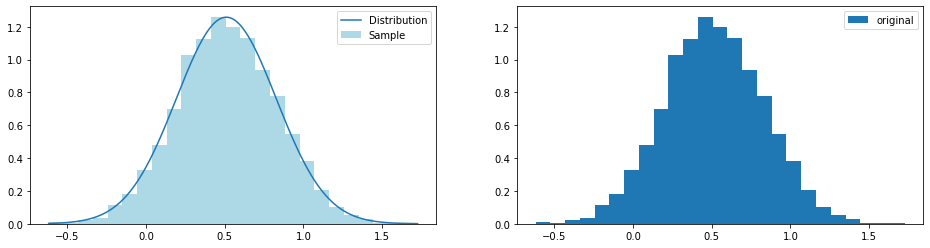

In [4]:
d = 0

def get_values():
    xrand, xjac, original_r = rtbm.make_sample_rho(nevt)

    x = []
    y = []
    ordered_r = []
    for i, j, k in sorted(zip(xrand[:,d], xjac, original_r)):
        x.append(i)
        y.append(j)
        ordered_r.append(k)

    x = np.array(x)
    y = np.array(y)
    ordered_r = np.array(ordered_r)
    return xrand, original_r, x, y, ordered_r

xrand, original_r, x, y, ordered_r = get_values()
        
plt.subplot(1,2,1)
plt.hist(xrand[:,d], bins=25, density=True, color="lightblue", label="Sample")
plt.plot(x, y, label="Distribution")
_ = plt.legend()
plt.subplot(1,2,2)
plt.hist(original_r[:,d], bins=25, density=True, label="original")
_ = plt.legend()

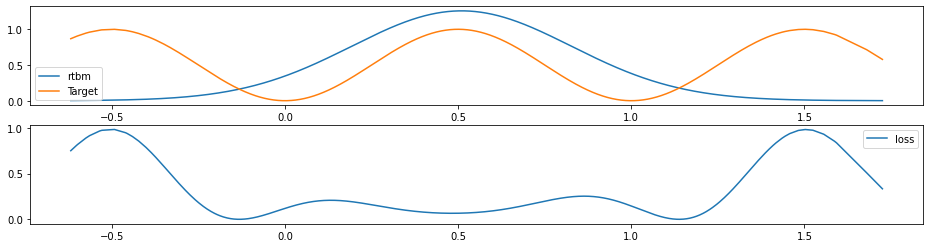

In [5]:
def my_fun(xarr):
    res = pow(np.sin(xarr*np.pi*1.0), 2)
    return res

def kl(x, y):
    return -(y*np.log(x+1e-8))

def mse(x, y):
    return (x-y)**2

loss = mse


my_y = my_fun(x)
_, y_rtbm = rtbm.get_transformation(ordered_r)
ll = loss(my_y, y_rtbm)

plt.subplot(2,1,1)
plt.plot(x, y_rtbm, label="rtbm")
plt.plot(x, my_y, label = "Target")
_ = plt.legend()
plt.subplot(2,1,2)
plt.plot(x, ll, label="loss")
_ = plt.legend()

In [10]:
bounds = rtbm.get_bounds()
options = {
    "bounds": bounds,
    "maxiter": 550,
    "tolfun": 1e-4,
    "popsize": 80,
    "verbose": 0,
}
sigma = np.max(bounds[1])*0.1
es = CMAEvolutionStrategy(params_0, sigma, options)

def target_loss(params):
    if not rtbm.set_parameters(params):
        return np.NaN
        #import ipdb; ipdb.set_trace()
    _, prob = rtbm.get_transformation(ordered_r)
    return np.sum(loss(prob, my_y))

es.optimize(target_loss)
_ = rtbm.set_parameters(es.result.xbest)
best_parameters = copy.deepcopy(rtbm.get_parameters())

(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=791763, Tue Mar  2 13:20:36 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 1.229080144563519e+03 1.0e+00 5.46e+00  5e+00  6e+00 0:03.1


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [9, 18, 26, 28, 32, 38, 40, 48, 59, 68, 74, 77, 79]/[] are nan/None and will be set to the median value 13818.32154428839 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 1.815769501281066e+03 1.3e+00 5.75e+00  5e+00  6e+00 0:05.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 6, 10, 12, 14, 16, 18, 19, 25, 32, 35, 39, 45, 49, 50, 63, 68, 72, 73, 74, 79]/[] are nan/None and will be set to the median value 9932.743632616213 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 1.443715673781009e+03 1.5e+00 6.18e+00  6e+00  7e+00 0:08.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 4, 6, 8, 10, 11, 12, 14, 16, 19, 20, 23, 24, 25, 27, 28, 29, 30, 36, 38, 40, 42, 43, 44, 46, 47, 48, 52, 55, 60, 69, 71, 76, 77, 79]/[] are nan/None and will be set to the median value 5447.240222966611 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 4, 5, 10, 11, 16, 17, 18, 19, 23, 25, 26, 27, 30, 32, 33, 34, 35, 36, 38, 40, 42, 52, 55, 57, 60, 61, 62, 66, 68, 69, 70, 72, 77]/[] are nan/None and will be set to the median value 6486.398121220903 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +


    5    400 1.664977564424343e+03 1.9e+00 5.68e+00  5e+00  6e+00 0:12.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 5, 8, 11, 13, 15, 16, 17, 18, 19, 20, 21, 23, 25, 29, 34, 35, 38, 39, 43, 45, 49, 50, 53, 56, 58, 59, 65, 69, 70, 71, 74, 77, 79]/[] are nan/None and will be set to the median value 6786.727566606099 (class=CMAEvolutionStrategy method=ask iteration=4)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 4, 8, 9, 12, 14, 15, 16, 17, 21, 24, 28, 30, 31, 34, 37, 39, 40, 42, 43, 44, 46, 47, 54, 57, 60, 61, 62, 63, 64, 72, 74, 75, 76, 78]/[] are nan/None and will be set to the median value 4421.103591844824 (class=CMAEvolutionStrategy method=ask iteration=5)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 17, 19, 22, 23, 27, 28, 3

    8    640 1.328955674140032e+03 2.0e+00 4.71e+00  3e+00  5e+00 0:17.7


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 4, 7, 8, 9, 13, 16, 22, 23, 24, 26, 28, 29, 31, 32, 34, 35, 37, 39, 42, 44, 45, 46, 47, 49, 50, 53, 55, 56, 57, 59, 63, 67, 68, 69, 71, 75, 76]/[] are nan/None and will be set to the median value 4421.103591844824 (class=CMAEvolutionStrategy method=ask iteration=7)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 5, 9, 11, 12, 14, 16, 20, 22, 25, 29, 30, 33, 37, 39, 44, 45, 46, 47, 49, 50, 51, 53, 57, 68, 69, 73, 76, 78]/[] are nan/None and will be set to the median value 4421.101382421579 (class=CMAEvolutionStrategy method=ask iteration=8)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 3, 5, 7, 11, 13, 16, 19, 21, 25, 26, 30, 32, 33, 34, 36, 37, 38

   11    880 1.456178386613440e+03 2.5e+00 4.53e+00  3e+00  5e+00 0:23.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 4, 11, 15, 16, 19, 23, 25, 26, 27, 28, 29, 31, 32, 33, 36, 38, 39, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 55, 60, 65, 67, 68, 69, 70, 72, 73, 74, 75, 76, 78]/[] are nan/None and will be set to the median value 4073.8840043514483 (class=CMAEvolutionStrategy method=ask iteration=10)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 4, 7, 9, 12, 17, 21, 22, 23, 27, 29, 31, 33, 38, 41, 42, 45, 46, 51, 54, 56, 59, 61, 65, 66, 69, 70, 73, 74, 77, 78]/[] are nan/None and will be set to the median value 4365.347018387795 (class=CMAEvolutionStrategy method=ask iteration=11)
  warnings.warn(msg + ' (' +


   13   1040 9.117228596234087e+02 3.0e+00 4.26e+00  3e+00  5e+00 0:29.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 4, 7, 8, 12, 13, 15, 19, 20, 21, 23, 24, 29, 30, 31, 33, 34, 35, 38, 43, 44, 45, 46, 48, 50, 52, 53, 55, 58, 59, 61, 63, 65, 67, 71, 74, 77, 78, 79]/[] are nan/None and will be set to the median value 3038.197088212894 (class=CMAEvolutionStrategy method=ask iteration=12)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 4, 7, 9, 11, 13, 14, 15, 20, 23, 24, 26, 28, 29, 30, 31, 32, 34, 36, 37, 40, 41, 42, 43, 49, 53, 55, 58, 59, 60, 63, 67, 68, 70, 71, 74, 75, 77, 78, 79]/[] are nan/None and will be set to the median value 4024.6349108975983 (class=CMAEvolutionStrategy method=ask iteration=13)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 7, 10, 14, 16, 17,

   18   1440 1.214706165552511e+03 3.7e+00 5.24e+00  3e+00  7e+00 0:38.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 4, 8, 10, 11, 15, 18, 19, 20, 21, 22, 23, 25, 26, 32, 33, 35, 36, 37, 41, 42, 43, 45, 46, 48, 50, 51, 52, 53, 54, 57, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 74, 77, 79]/[] are nan/None and will be set to the median value 3814.2167131549822 (class=CMAEvolutionStrategy method=ask iteration=17)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 4, 5, 7, 8, 9, 10, 12, 14, 15, 16, 17, 18, 21, 23, 25, 27, 29, 30, 31, 33, 36, 38, 39, 40, 42, 45, 48, 50, 51, 52, 53, 55, 58, 62, 67, 70, 72, 75]/[] are nan/None and will be set to the median value 4070.3534825127094 (class=CMAEvolutionStrategy method=ask iteration=18)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index

   23   1840 8.230661485977146e+02 4.7e+00 5.20e+00  2e+00  7e+00 0:46.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17, 18, 19, 20, 21, 22, 25, 26, 29, 30, 31, 34, 40, 42, 45, 46, 47, 48, 49, 52, 56, 58, 62, 63, 64, 65, 66, 67, 68, 71, 73, 75, 78]/[] are nan/None and will be set to the median value 3595.178767227342 (class=CMAEvolutionStrategy method=ask iteration=22)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 6, 7, 12, 16, 18, 19, 22, 25, 26, 30, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 45, 46, 48, 49, 51, 56, 58, 60, 61, 62, 63, 70, 73, 74, 76, 77, 79]/[] are nan/None and will be set to the median value 3396.725683428211 (class=CMAEvolutionStrategy method=ask iteration=23)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 3, 5, 8, 

   28   2240 8.334839729031421e+02 5.2e+00 5.30e+00  2e+00  7e+00 0:56.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 8, 9, 10, 12, 13, 16, 20, 21, 22, 23, 26, 27, 29, 32, 35, 36, 37, 38, 42, 43, 47, 48, 51, 54, 55, 56, 57, 58, 60, 62, 69, 70, 71, 72, 75, 76, 79]/[] are nan/None and will be set to the median value 3226.9040214542892 (class=CMAEvolutionStrategy method=ask iteration=27)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 5, 7, 13, 14, 19, 21, 26, 27, 28, 30, 31, 33, 34, 35, 37, 39, 41, 46, 49, 50, 51, 57, 58, 59, 60, 62, 65, 67, 70, 71, 77, 78]/[] are nan/None and will be set to the median value 2643.780314797477 (class=CMAEvolutionStrategy method=ask iteration=28)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 5, 8, 9, 11, 14, 17, 18, 20, 23, 26, 29, 30, 

   33   2640 6.346834687576586e+02 7.8e+00 6.12e+00  1e+00  7e+00 1:07.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 11, 13, 17, 18, 19, 23, 30, 31, 38, 42, 43, 44, 46, 48, 52, 53, 57, 59, 63, 73, 77, 78]/[] are nan/None and will be set to the median value 2585.0099079927995 (class=CMAEvolutionStrategy method=ask iteration=32)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 4, 7, 10, 12, 14, 16, 18, 19, 21, 23, 29, 34, 37, 41, 46, 47, 48, 50, 51, 52, 53, 55, 56, 58, 64, 65, 66, 68, 70, 74, 77, 79]/[] are nan/None and will be set to the median value 2283.1161464403312 (class=CMAEvolutionStrategy method=ask iteration=33)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 6, 7, 8, 9, 10, 11, 12, 14, 16, 20, 23, 24, 26, 27, 32, 36, 37, 38, 39, 40, 42, 43, 48, 50, 53, 55, 59

   38   3040 7.997255216759796e+02 1.9e+01 5.94e+00  6e-01  7e+00 1:19.1


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 4, 13, 15, 24, 29, 31, 33, 34, 39, 43, 44, 47, 48, 49, 52, 54, 57, 67, 68, 76, 77]/[] are nan/None and will be set to the median value 1685.9323502902898 (class=CMAEvolutionStrategy method=ask iteration=37)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 12, 13, 17, 20, 23, 26, 27, 29, 36, 38, 40, 48, 64, 66]/[] are nan/None and will be set to the median value 1186.9906706819725 (class=CMAEvolutionStrategy method=ask iteration=38)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 5, 8, 16, 17, 21, 22, 23, 24, 34, 35, 36, 39, 49, 50, 54, 61, 65, 67, 71, 74, 75, 76, 78]/[] are nan/None and will be set to the median value 1140.5785808475737 (class=CMAEvolut

   43   3440 7.992049245114831e+02 3.3e+01 4.35e+00  3e-01  4e+00 1:33.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [17, 27, 29, 30, 31, 39, 53, 55, 63, 69, 71, 72, 74]/[] are nan/None and will be set to the median value 932.4751646645143 (class=CMAEvolutionStrategy method=ask iteration=42)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 12, 14, 17, 21, 23, 29, 30, 32, 35, 39, 48, 61, 62, 74]/[] are nan/None and will be set to the median value 868.0660646800901 (class=CMAEvolutionStrategy method=ask iteration=43)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 39, 43, 50, 53, 55, 57, 62]/[] are nan/None and will be set to the median value 839.1810907119176 (class=CMAEvolutionStrategy method=ask iteration=44)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace

   48   3840 6.395922180784956e+02 6.0e+01 5.59e+00  2e-01  5e+00 1:47.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [6, 12, 14, 17, 19, 20, 22, 27, 28, 33, 37, 38, 39, 49, 55, 57, 58, 69, 71, 76, 78, 79]/[] are nan/None and will be set to the median value 835.5402690801494 (class=CMAEvolutionStrategy method=ask iteration=47)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [5, 9, 16, 27, 32, 35, 36, 41, 42, 46, 54, 56, 58, 59, 65, 67, 68, 69, 73, 76]/[] are nan/None and will be set to the median value 832.3110364440466 (class=CMAEvolutionStrategy method=ask iteration=48)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 6, 10, 12, 14, 17, 30, 37, 41, 48, 51, 54, 58, 66, 76]/[] are nan/None and will be set to the median value 857.4847362990484 (class=CMAEvolutionStrategy method=as

   53   4240 7.340074732387554e+02 6.4e+01 5.47e+00  1e-01  4e+00 2:02.4


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [11, 13, 24, 33, 41, 68, 71]/[] are nan/None and will be set to the median value 816.6510024726795 (class=CMAEvolutionStrategy method=ask iteration=52)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [14, 25, 37, 48, 53, 73]/[] are nan/None and will be set to the median value 810.7604308499494 (class=CMAEvolutionStrategy method=ask iteration=53)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 33, 36, 52, 54]/[] are nan/None and will be set to the median value 805.8528246705257 (class=CMAEvolutionStrategy method=ask iteration=54)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function valu

   58   4640 7.712141593727487e+02 1.3e+02 4.73e+00  6e-02  4e+00 2:19.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 10, 22, 49]/[] are nan/None and will be set to the median value 800.4498066211963 (class=CMAEvolutionStrategy method=ask iteration=57)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [34, 35, 38, 48, 53, 60, 65, 72, 73]/[] are nan/None and will be set to the median value 800.2379745013222 (class=CMAEvolutionStrategy method=ask iteration=58)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 10, 12, 17, 22, 29, 33, 35, 43, 46, 47, 53, 55, 62, 64, 70, 74]/[] are nan/None and will be set to the median value 801.3362311074975 (class=CMAEvolutionStrategy method=ask iteration=59)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/uti

   64   5120 7.284850911651495e+02 2.2e+02 5.19e+00  4e-02  4e+00 2:37.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [14, 47, 51, 52, 60, 61, 79]/[] are nan/None and will be set to the median value 799.0433734568976 (class=CMAEvolutionStrategy method=ask iteration=63)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 5, 10, 11, 18, 32, 42, 43, 45, 50, 51, 58, 67, 70, 73, 76, 77]/[] are nan/None and will be set to the median value 799.1488513653846 (class=CMAEvolutionStrategy method=ask iteration=64)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 8, 10, 15, 22, 30, 35, 49, 74]/[] are nan/None and will be set to the median value 799.1636440799424 (class=CMAEvolutionStrategy method=ask iteration=65)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pyc

   70   5600 7.361925217174853e+02 3.2e+02 4.99e+00  3e-02  3e+00 2:55.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 7, 9, 12, 14, 16, 19, 21, 25, 30, 48, 55, 57, 63, 65, 73]/[] are nan/None and will be set to the median value 799.0462190075509 (class=CMAEvolutionStrategy method=ask iteration=69)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 4, 5, 6, 16, 18, 28, 31, 34, 43, 57, 66, 72, 77]/[] are nan/None and will be set to the median value 798.4909391018109 (class=CMAEvolutionStrategy method=ask iteration=70)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 3, 5, 8, 15, 18, 19, 26, 27, 29, 35, 43, 44, 46, 48, 60, 64, 69, 70, 73, 76, 78]/[] are nan/None and will be set to the median value 799.060442676663 (class=CMAEvolutionStrategy method=ask iteration=71)
  warnin

   77   6160 7.462645153208113e+02 3.9e+02 5.30e+00  2e-02  3e+00 3:15.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 8, 17, 18, 26, 28, 31, 34, 43, 47, 49, 52, 55, 62, 65, 67]/[] are nan/None and will be set to the median value 798.9354073823712 (class=CMAEvolutionStrategy method=ask iteration=76)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 6, 8, 27, 29, 35, 40, 46, 50, 54, 58, 59, 63, 72]/[] are nan/None and will be set to the median value 798.4190480939947 (class=CMAEvolutionStrategy method=ask iteration=77)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 12, 13, 16, 22, 23, 26, 28, 40, 47, 51, 60, 61, 74]/[] are nan/None and will be set to the median value 798.5213646911795 (class=CMAEvolutionStrategy method=ask iteration=78)
  warnings.warn(msg + ' (' +
/media/s

   84   6720 7.340118910280352e+02 4.8e+02 5.78e+00  2e-02  3e+00 3:35.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 12, 17, 31, 32, 34, 42, 61, 62, 71, 75]/[] are nan/None and will be set to the median value 798.7243209748615 (class=CMAEvolutionStrategy method=ask iteration=83)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [22, 75, 76]/[] are nan/None and will be set to the median value 795.9965070775256 (class=CMAEvolutionStrategy method=ask iteration=84)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [30, 42, 65, 66]/[] are nan/None and will be set to the median value 796.2670526619977 (class=CMAEvolutionStrategy method=ask iteration=85)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function valu

   90   7200 7.316154353947038e+02 4.7e+02 4.09e+00  1e-02  2e+00 3:56.4


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [32]/[] are nan/None and will be set to the median value 781.5954618196522 (class=CMAEvolutionStrategy method=ask iteration=90)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [13]/[] are nan/None and will be set to the median value 772.5452027656772 (class=CMAEvolutionStrategy method=ask iteration=91)
  warnings.warn(msg + ' (' +


   96   7680 7.291611709115029e+02 4.8e+02 3.64e+00  1e-02  1e+00 4:17.7


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [56]/[] are nan/None and will be set to the median value 765.6946466625426 (class=CMAEvolutionStrategy method=ask iteration=95)
  warnings.warn(msg + ' (' +


  100   8000 7.147572005639115e+02 5.0e+02 5.87e+00  2e-02  2e+00 4:31.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [74]/[] are nan/None and will be set to the median value 741.1173291508696 (class=CMAEvolutionStrategy method=ask iteration=99)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [14, 17, 23, 56, 76]/[] are nan/None and will be set to the median value 742.8045127935815 (class=CMAEvolutionStrategy method=ask iteration=100)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [10, 15, 18, 27, 56]/[] are nan/None and will be set to the median value 734.9770717682334 (class=CMAEvolutionStrategy method=ask iteration=101)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [10, 12, 17

  108   8640 6.766308622276110e+02 4.9e+02 1.06e+01  5e-02  3e+00 4:57.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [21, 23, 26, 36, 39, 50, 59, 64, 67, 72]/[] are nan/None and will be set to the median value 714.8686487225781 (class=CMAEvolutionStrategy method=ask iteration=107)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 4, 7, 8, 12, 21, 23, 24, 28, 31, 51, 58, 60, 63, 68, 69, 74, 75, 76, 78]/[] are nan/None and will be set to the median value 720.0665340792148 (class=CMAEvolutionStrategy method=ask iteration=108)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [5, 11, 13, 19, 20, 35, 36, 41, 44, 66, 67, 68, 73]/[] are nan/None and will be set to the median value 714.7489380562915 (class=CMAEvolutionStrategy method=ask iteration=109)
  warnings.warn(msg + ' (' +
/media/s

  117   9360 6.068419109641136e+02 4.5e+02 2.21e+01  8e-02  5e+00 5:21.7


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 9, 10, 21, 26, 30, 55, 60, 63, 67, 73, 75, 77]/[] are nan/None and will be set to the median value 704.0302419168336 (class=CMAEvolutionStrategy method=ask iteration=116)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 9, 19, 21, 30, 32, 47, 48, 50, 52, 54, 69, 79]/[] are nan/None and will be set to the median value 715.8423957428606 (class=CMAEvolutionStrategy method=ask iteration=117)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 24, 26, 51, 70, 78]/[] are nan/None and will be set to the median value 718.494968792281 (class=CMAEvolutionStrategy method=ask iteration=118)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pyc

  125  10000 5.691205519520299e+02 4.5e+02 2.13e+01  7e-02  4e+00 5:48.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [13]/[] are nan/None and will be set to the median value 626.4786858372929 (class=CMAEvolutionStrategy method=ask iteration=126)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [13, 55]/[] are nan/None and will be set to the median value 618.5600160739855 (class=CMAEvolutionStrategy method=ask iteration=127)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [32, 40, 77]/[] are nan/None and will be set to the median value 807.1515500524703 (class=CMAEvolutionStrategy method=ask iteration=128)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [11, 15, 17, 25, 65]/[] are na

  133  10640 5.118201574059084e+02 4.1e+02 4.46e+01  1e-01  5e+00 6:16.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [28, 53, 58]/[] are nan/None and will be set to the median value 674.7849898896011 (class=CMAEvolutionStrategy method=ask iteration=132)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 14, 23, 46, 48, 53]/[] are nan/None and will be set to the median value 719.0861571534817 (class=CMAEvolutionStrategy method=ask iteration=133)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 19, 29, 31, 35, 38, 48, 55, 67]/[] are nan/None and will be set to the median value 644.8308392927162 (class=CMAEvolutionStrategy method=ask iteration=134)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function va

  142  11360 4.041150275382939e+02 4.0e+02 7.70e+01  2e-01  6e+00 6:45.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 15, 39, 50, 52, 54, 60, 61]/[] are nan/None and will be set to the median value 656.9426903627609 (class=CMAEvolutionStrategy method=ask iteration=141)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [11, 12, 17, 24, 38, 49, 61]/[] are nan/None and will be set to the median value 588.624327170583 (class=CMAEvolutionStrategy method=ask iteration=142)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [16, 25, 37, 41, 45, 47, 55, 67, 72]/[] are nan/None and will be set to the median value 607.0576327485096 (class=CMAEvolutionStrategy method=ask iteration=143)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: 

  151  12080 2.048399019575433e+02 4.7e+02 1.03e+02  3e-01  7e+00 7:14.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [79]/[] are nan/None and will be set to the median value 504.17932349966924 (class=CMAEvolutionStrategy method=ask iteration=150)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 17, 36]/[] are nan/None and will be set to the median value 533.0260656717194 (class=CMAEvolutionStrategy method=ask iteration=151)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [5, 6, 33, 39]/[] are nan/None and will be set to the median value 433.7161022821892 (class=CMAEvolutionStrategy method=ask iteration=152)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 28, 32, 42, 54, 64, 

  160  12800 1.589176963755248e+02 3.9e+02 1.51e+02  3e-01  7e+00 7:46.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [10, 19]/[] are nan/None and will be set to the median value 399.32433137367565 (class=CMAEvolutionStrategy method=ask iteration=159)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 8, 27, 33]/[] are nan/None and will be set to the median value 354.7451227331767 (class=CMAEvolutionStrategy method=ask iteration=160)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 17, 24, 39, 68, 79]/[] are nan/None and will be set to the median value 390.6385480962485 (class=CMAEvolutionStrategy method=ask iteration=161)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [19, 

  169  13520 9.697552689915429e+01 5.5e+02 1.36e+02  2e-01  6e+00 8:17.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [74]/[] are nan/None and will be set to the median value 163.49898875814876 (class=CMAEvolutionStrategy method=ask iteration=168)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [54]/[] are nan/None and will be set to the median value 161.13992402279075 (class=CMAEvolutionStrategy method=ask iteration=169)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 11, 44]/[] are nan/None and will be set to the median value 154.91610920752638 (class=CMAEvolutionStrategy method=ask iteration=171)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 51, 60, 71]/[] are nan/None 

  178  14240 7.412061787305669e+01 6.4e+02 2.49e+02  2e-01  6e+00 8:48.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [20, 55, 57, 72]/[] are nan/None and will be set to the median value 139.2011085021517 (class=CMAEvolutionStrategy method=ask iteration=177)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 33, 47]/[] are nan/None and will be set to the median value 122.0320029652467 (class=CMAEvolutionStrategy method=ask iteration=178)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [60]/[] are nan/None and will be set to the median value 118.71131550596918 (class=CMAEvolutionStrategy method=ask iteration=179)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 12, 16, 44]/[] are

  188  15040 5.298877192265113e+01 9.4e+02 2.38e+02  1e-01  5e+00 9:21.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 5, 14, 18, 24, 30, 48, 54, 55, 56, 72]/[] are nan/None and will be set to the median value 81.72955595016039 (class=CMAEvolutionStrategy method=ask iteration=187)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 4, 24, 27, 29, 44, 45, 46, 48, 49, 54, 74]/[] are nan/None and will be set to the median value 80.91460268146407 (class=CMAEvolutionStrategy method=ask iteration=188)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [6, 10, 13, 17, 22, 38, 51, 68]/[] are nan/None and will be set to the median value 81.92232516545087 (class=CMAEvolutionStrategy method=ask iteration=189)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma

  198  15840 4.127796938227367e+01 1.2e+03 2.49e+02  1e-01  4e+00 9:55.7


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [23, 31, 64, 71]/[] are nan/None and will be set to the median value 81.21550523053364 (class=CMAEvolutionStrategy method=ask iteration=197)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [10, 71, 73]/[] are nan/None and will be set to the median value 62.762478086197476 (class=CMAEvolutionStrategy method=ask iteration=198)
  warnings.warn(msg + ' (' +


  200  16000 4.052378862807108e+01 1.2e+03 2.50e+02  1e-01  4e+00 10:02.7
  210  16800 3.731726735817652e+01 1.4e+03 2.14e+02  6e-02  2e+00 10:38.7
  221  17680 3.589574885232595e+01 1.9e+03 2.19e+02  4e-02  2e+00 11:18.1
  232  18560 3.532738620877096e+01 2.7e+03 2.26e+02  2e-02  1e+00 11:57.6
  243  19440 3.443084540247130e+01 3.3e+03 2.47e+02  1e-02  1e+00 12:37.1
  254  20320 3.360727218390642e+01 2.4e+03 4.27e+02  1e-02  1e+00 13:16.5
  266  21280 3.294984873551184e+01 8.5e+02 6.53e+02  1e-02  7e-01 13:59.5
  278  22240 3.279624493843470e+01 1.2e+03 4.74e+02  3e-03  3e-01 14:42.5
  290  23200 3.278143287654074e+01 1.5e+03 3.39e+02  9e-04  1e-01 15:25.4
  300  24000 3.277213127730752e+01 2.2e+03 2.75e+02  5e-04  1e-01 16:01.2
  313  25040 3.276794254473315e+01 3.1e+03 2.87e+02  3e-04  8e-02 16:47.9
  326  26080 3.276473650294601e+01 3.0e+03 2.18e+02  2e-04  4e-02 17:34.5
  339  27120 3.276245324546738e+01 3.9e+03 2.56e+02  1e-04  3e-02 18:21.1
  353  28240 3.276135855231973e+01 5.0

/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (class=CMAEvolutionStrategy method=alleviate_conditioning iteration=545)
  warnings.warn(msg + ' (' +


  550  44000 3.276096130133482e+01 1.9e+00 5.00e+01  4e+01  5e+01 30:56.0


In [11]:
#current_parameters = copy.deepcopy(rtbm.get_parameters())
#_ = rtbm.set_parameters(current_parameters)
#rtbm(np.array([[-0.4, -0.3, -0.2, 0.0, 0.083567, 0.084]]))

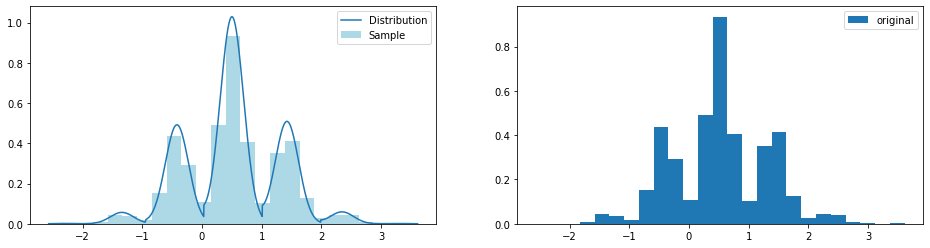

In [12]:
xrand_post, original_r_post, x_post, y_post, _ = get_values()
        
plt.subplot(1,2,1)
plt.hist(xrand_post[:,d], bins=25, density=True, color="lightblue", label="Sample")
plt.plot(x_post, y_post, label="Distribution")
_ = plt.legend()
plt.subplot(1,2,2)
plt.hist(original_r_post[:,d], bins=25, density=True, label="original")
_ = plt.legend()

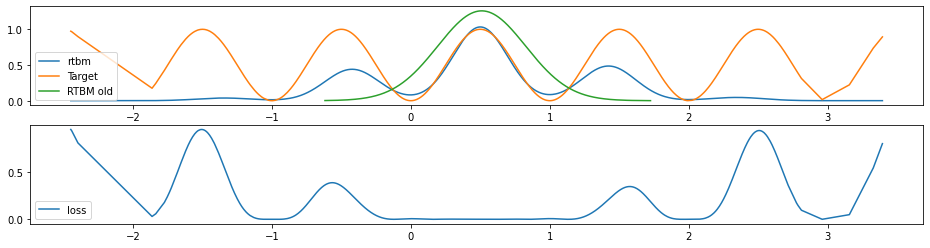

In [9]:
my_y_post = my_fun(x_post)
ll_post = loss(my_y_post, y_post)


plt.subplot(2,1,1)
plt.plot(x_post, y_post, label="rtbm")
plt.plot(x_post, my_y_post, label = "Target")
plt.plot(x, y, label="RTBM old")
_ = plt.legend()
plt.subplot(2,1,2)
plt.plot(x_post, ll_post, label="loss")
_ = plt.legend()

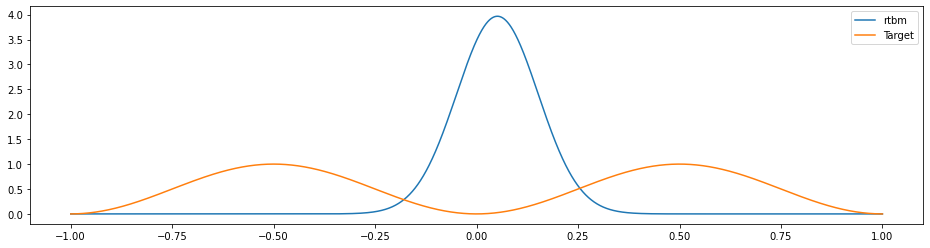

In [86]:
do_uniform = True
rtbm.set_parameters(params_0)
if do_uniform:
    original_x_uniform = np.array(sorted(-1.0 + 2.0*np.random.rand(int(nevt),1)))
    x_uniform, y_uniform = rtbm.get_transformation(original_x_uniform)
    my_uniform = my_fun(x_uniform)

    plt.plot(x_uniform, y_uniform, label="rtbm")
    plt.plot(x_uniform, my_uniform, label = "Target")
    _ = plt.legend()

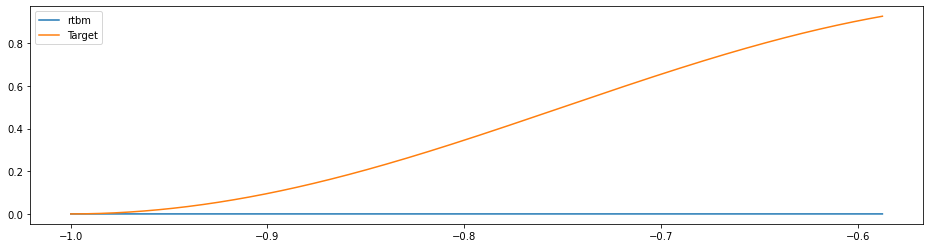

In [87]:
if do_uniform:
    batches = 5
    n_per_batch = int(len(original_x_uniform)/batches)
    
    i = 0
    
    xb = x_uniform[i*n_per_batch:(i+1)*n_per_batch]
    yb = y_uniform[i*n_per_batch:(i+1)*n_per_batch]
    myb = my_uniform[i*n_per_batch:(i+1)*n_per_batch]

    plt.plot(xb, yb, label="rtbm")
    plt.plot(xb, myb, label = "Target")
    _ = plt.legend()

In [88]:
if do_uniform:
    rtbm.set_parameters(params_0)
    for _ in range(15):
        options = {
            "bounds": bounds,
            "maxiter": 40,
            "tolfun": 1e-4,
            "popsize": 80,
            "verbose": 0,
        }
        initial_state = copy.deepcopy(rtbm.get_parameters())
        es = CMAEvolutionStrategy(initial_state, sigma, options)
        
        i = np.random.randint(batches)
        xx = original_x_uniform[i*n_per_batch:(i+1)*n_per_batch]
        yy = my_uniform[i*n_per_batch:(i+1)*n_per_batch]

        def target_loss(params):
            if not rtbm.set_parameters(params):
                return np.NaN
                #import ipdb; ipdb.set_trace()
            _, prob = rtbm.get_transformation(xx)
            return np.sum(loss(prob, yy))

        es.optimize(target_loss)
        _ = rtbm.set_parameters(es.result.xbest)
    best_uniform_parameters = copy.deepcopy(rtbm.get_parameters())

(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=779445, Tue Mar  2 17:09:40 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 -3.542021794862240e+05 1.0e+00 5.17e+00  5e+00  5e+00 0:01.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 10, 25, 30, 34, 37, 38, 39, 45, 48, 63, 65, 69]/[] are nan/None and will be set to the median value -28355.424508793683 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 -3.587882698471009e+05 1.3e+00 5.49e+00  4e+00  6e+00 0:02.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [6, 14, 16, 22, 28, 34, 35, 38, 39, 41, 43, 61, 69, 71, 72, 75]/[] are nan/None and will be set to the median value -94388.63093827055 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 -3.567093336392241e+05 1.5e+00 5.24e+00  4e+00  6e+00 0:03.4


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 12, 14, 15, 18, 21, 24, 25, 27, 33, 36, 38, 40, 43, 55, 61, 68, 75, 77]/[] are nan/None and will be set to the median value -54792.55715289021 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [15, 18, 21, 24, 29, 32, 34, 60, 61, 67, 74, 75, 77]/[] are nan/None and will be set to the median value -218827.52151888955 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 3, 6, 26, 31, 38, 56, 57, 61, 67, 76]/[] are nan/None and will be set to the median value -160676.5748205004 (class=CMAEvolutionStrategy method=ask iteration=4)
  warnings.warn(msg + ' (' +


    6    480 -3.614609672544054e+05 2.4e+00 4.50e+00  2e+00  5e+00 0:06.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 11, 12, 16, 18, 28, 47, 50, 61, 67, 71, 72, 73, 74, 78]/[] are nan/None and will be set to the median value -186944.71142412577 (class=CMAEvolutionStrategy method=ask iteration=5)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 21, 23, 29, 30, 42, 43, 51, 57, 58, 60, 70]/[] are nan/None and will be set to the median value -297330.8649443763 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [6, 45, 72]/[] are nan/None and will be set to the median value -333186.7509796412 (class=CMAEvolutionStrategy method=ask iteration=7)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/uti

   10    800 -3.623551148002052e+05 4.6e+00 4.00e+00  1e+00  4e+00 0:11.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [53, 54]/[] are nan/None and will be set to the median value -336821.2799306618 (class=CMAEvolutionStrategy method=ask iteration=9)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 11, 43]/[] are nan/None and will be set to the median value -349676.6190883689 (class=CMAEvolutionStrategy method=ask iteration=10)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [11, 38]/[] are nan/None and will be set to the median value -353908.1391436546 (class=CMAEvolutionStrategy method=ask iteration=11)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [53, 64]/[] are nan/None and

   14   1120 -3.624594830148067e+05 7.3e+00 3.37e+00  5e-01  4e+00 0:17.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [25]/[] are nan/None and will be set to the median value -359375.6516668014 (class=CMAEvolutionStrategy method=ask iteration=13)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [45]/[] are nan/None and will be set to the median value -360300.3119720679 (class=CMAEvolutionStrategy method=ask iteration=14)
  warnings.warn(msg + ' (' +


   19   1520 -3.625428891331004e+05 1.6e+01 3.41e+00  2e-01  3e+00 0:23.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [62]/[] are nan/None and will be set to the median value -361912.2429772672 (class=CMAEvolutionStrategy method=ask iteration=18)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8]/[] are nan/None and will be set to the median value -362112.46792764164 (class=CMAEvolutionStrategy method=ask iteration=22)
  warnings.warn(msg + ' (' +


   25   2000 -3.625413704585006e+05 3.9e+01 4.13e+00  1e-01  4e+00 0:31.4


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [62, 78]/[] are nan/None and will be set to the median value -362344.86747389357 (class=CMAEvolutionStrategy method=ask iteration=24)
  warnings.warn(msg + ' (' +


   32   2560 -3.625471124787666e+05 1.6e+02 2.80e+00  2e-02  3e+00 0:40.5
   39   3120 -3.625472082199489e+05 6.6e+02 1.68e+00  3e-03  2e+00 0:49.6
   40   3200 -3.625472112500976e+05 8.1e+02 1.57e+00  3e-03  2e+00 0:50.9
(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=765051, Tue Mar  2 17:10:31 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 -3.864594921306441e+05 1.0e+00 4.89e+00  4e+00  5e+00 0:01.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 5, 18, 19, 20, 24, 25, 30, 32, 39, 46, 47, 50, 52, 58, 62, 64, 68, 70, 72, 73, 76, 77]/[] are nan/None and will be set to the median value 28380051.750258945 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 8.155093045457980e+05 1.3e+00 4.85e+00  4e+00  5e+00 0:01.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 5, 12, 17, 18, 21, 24, 27, 28, 33, 35, 38, 40, 41, 42, 49, 52, 54, 55, 58, 59, 60, 62, 64, 69, 71, 76, 79]/[] are nan/None and will be set to the median value 25825501.55246376 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 -1.054736505013327e+06 1.6e+00 5.04e+00  4e+00  6e+00 0:02.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 3, 4, 5, 8, 9, 12, 17, 19, 21, 22, 28, 33, 34, 44, 48, 50, 51, 54, 57, 58, 60, 63, 67, 70, 73, 74, 75, 76, 79]/[] are nan/None and will be set to the median value 15253629.256869404 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 7, 8, 9, 10, 14, 17, 18, 19, 21, 25, 30, 31, 32, 33, 37, 38, 39, 42, 43, 52, 53, 54, 55, 61, 62, 64, 66, 67, 68, 71, 74, 75, 76, 77]/[] are nan/None and will be set to the median value 17247348.253294844 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 2, 5, 7, 11, 15, 16, 18, 19, 20, 21, 24, 26, 29, 31, 33, 36, 38, 39, 40

    8    640 -8.846584014928770e+05 2.0e+00 4.35e+00  3e+00  4e+00 0:06.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 4, 7, 11, 14, 15, 18, 19, 20, 25, 26, 31, 32, 33, 35, 36, 38, 40, 42, 44, 46, 48, 49, 50, 51, 54, 55, 58, 61, 66, 67, 68, 69, 71, 74, 75, 77, 79]/[] are nan/None and will be set to the median value 5164747.062991039 (class=CMAEvolutionStrategy method=ask iteration=7)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 5, 9, 11, 14, 16, 21, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 44, 45, 46, 47, 49, 50, 53, 54, 57, 58, 62, 63, 65, 68, 71, 73, 79]/[] are nan/None and will be set to the median value 9977255.592082845 (class=CMAEvolutionStrategy method=ask iteration=8)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 4, 7, 8, 10, 12, 13, 14, 15, 17,

   13   1040 -7.650021190000061e+05 3.1e+00 4.50e+00  2e+00  4e+00 0:10.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 4, 5, 15, 16, 19, 26, 28, 31, 33, 37, 38, 42, 43, 45, 52, 54, 66, 67, 68, 72]/[] are nan/None and will be set to the median value 4893815.404322549 (class=CMAEvolutionStrategy method=ask iteration=12)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 5, 16, 18, 22, 26, 27, 30, 41, 42, 45, 52, 57, 62, 64, 70]/[] are nan/None and will be set to the median value 2501125.984997228 (class=CMAEvolutionStrategy method=ask iteration=13)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 3, 14, 42, 46, 47, 49, 60, 65, 67, 77, 78]/[] are nan/None and will be set to the median value 4383319.3754678285 (class=CMAEvolutionStrategy method=ask iteration=14)
  warnings.war

   18   1440 -9.547465605659784e+05 5.4e+00 5.20e+00  1e+00  5e+00 0:15.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 8, 9, 10, 17, 30, 31, 32, 45, 49, 51]/[] are nan/None and will be set to the median value 820925.0420760531 (class=CMAEvolutionStrategy method=ask iteration=17)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 3, 17, 19, 21, 24, 30, 40, 43, 46, 47, 50, 64, 69, 70]/[] are nan/None and will be set to the median value 3229979.139955655 (class=CMAEvolutionStrategy method=ask iteration=18)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 10, 20, 21, 26, 30, 32, 41, 50, 53, 58, 79]/[] are nan/None and will be set to the median value 2013426.115460313 (class=CMAEvolutionStrategy method=ask iteration=19)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Works

   24   1920 -9.601820746565285e+05 1.1e+01 7.03e+00  1e+00  6e+00 0:22.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 10, 15, 19, 56, 73]/[] are nan/None and will be set to the median value 410305.6042297742 (class=CMAEvolutionStrategy method=ask iteration=23)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 14, 22, 30, 34, 35, 39, 48, 51, 54, 59, 61, 69, 71, 72, 73]/[] are nan/None and will be set to the median value 531173.9813546566 (class=CMAEvolutionStrategy method=ask iteration=24)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 7, 8, 12, 14, 20, 25, 28, 29, 31, 32, 41, 49, 50, 62]/[] are nan/None and will be set to the median value 898309.9756976089 (class=CMAEvolutionStrategy method=ask iteration=25)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspac

   31   2480 -1.066413312792861e+06 2.3e+01 9.55e+00  1e+00  9e+00 0:29.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 5, 7, 8, 12, 16, 19, 26, 35, 39, 40, 42, 45, 46, 54, 58, 60, 62, 71, 77]/[] are nan/None and will be set to the median value -173849.59871449455 (class=CMAEvolutionStrategy method=ask iteration=30)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 6, 9, 33, 49, 58, 61, 65, 70, 71, 73, 77, 79]/[] are nan/None and will be set to the median value -379212.66402278014 (class=CMAEvolutionStrategy method=ask iteration=31)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [20, 27, 40, 44, 46, 47, 58, 62, 65, 66, 70, 71, 76, 77]/[] are nan/None and will be set to the median value -487811.332838094 (class=CMAEvolutionStrategy method=ask iteration=32)
  warnings.warn(msg + 

   39   3120 -1.104038047392137e+06 4.1e+01 1.04e+01  8e-01  8e+00 0:39.1


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [38, 65]/[] are nan/None and will be set to the median value -743341.7836322945 (class=CMAEvolutionStrategy method=ask iteration=38)
  warnings.warn(msg + ' (' +


   40   3200 -1.101061510540822e+06 4.4e+01 9.96e+00  6e-01  8e+00 0:40.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 28, 38, 55, 61, 71, 72, 76]/[] are nan/None and will be set to the median value -887841.8249573987 (class=CMAEvolutionStrategy method=ask iteration=39)
  warnings.warn(msg + ' (' +


(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=864756, Tue Mar  2 17:11:11 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 1.166028504090813e+06 1.0e+00 5.49e+00  5e+00  6e+00 0:00.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 8, 10, 12, 13, 18, 21, 24, 26, 32, 36, 43, 44, 47, 50, 56, 62, 63, 67, 70, 74, 77, 79]/[] are nan/None and will be set to the median value 59944975.02324528 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 3.213219604535149e+07 1.4e+00 6.04e+00  5e+00  7e+00 0:01.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 9, 11, 14, 16, 19, 20, 29, 30, 33, 35, 36, 41, 47, 54, 56, 58, 59, 60, 61, 63, 64, 68, 69, 71, 72, 77]/[] are nan/None and will be set to the median value 59917102.151857294 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 1.900795205146173e+07 1.7e+00 6.70e+00  5e+00  8e+00 0:02.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 13, 14, 15, 23, 28, 38, 42, 43, 44, 60, 62, 64, 65, 66, 70, 72, 75, 77]/[] are nan/None and will be set to the median value 59667097.70951335 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 6, 9, 10, 14, 16, 20, 26, 29, 33, 42, 43, 45, 50, 57, 64, 67, 71, 77, 78]/[] are nan/None and will be set to the median value 58843599.33384129 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 8, 11, 12, 15, 16, 18, 19, 24, 26, 27, 44, 45, 47, 49, 52, 63, 64, 66, 69, 70, 74, 78]/[] are nan/None and will be set to the median value 59490347.507473186 (class=CMAEvolution

    6    480 1.686861798382872e+06 3.0e+00 1.07e+01  8e+00  2e+01 0:06.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 5, 6, 20, 22, 25, 35, 43, 47, 50, 52, 54, 57, 59, 66, 70, 76, 78]/[] are nan/None and will be set to the median value 58237676.40979067 (class=CMAEvolutionStrategy method=ask iteration=5)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 9, 13, 16, 18, 22, 23, 25, 32, 36, 41, 43, 44, 45, 49, 50, 52, 53, 60, 61, 64, 66, 71, 72, 74, 75, 77, 78]/[] are nan/None and will be set to the median value 57213947.173692025 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 5, 9, 12, 14, 15, 17, 20, 22, 24, 25, 26, 28, 31, 32, 34, 35, 37, 38, 41, 42, 45, 46, 48, 55, 57, 58, 59, 66, 67, 68, 69, 73, 75, 77, 79]/[] ar

   12    960 -2.063129081591246e+06 4.5e+00 1.78e+01  1e+01  4e+01 0:10.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 3, 4, 7, 8, 13, 14, 15, 16, 19, 22, 23, 24, 27, 28, 31, 32, 34, 38, 41, 42, 43, 44, 45, 48, 49, 50, 53, 56, 61, 63, 64, 66, 67, 70, 72, 74, 75, 78]/[] are nan/None and will be set to the median value 58020162.49458769 (class=CMAEvolutionStrategy method=ask iteration=11)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 33, 37, 38, 39, 42, 46, 49, 50, 53, 54, 55, 56, 59, 61, 62, 63, 67, 68, 69, 70, 71, 72, 73, 78, 79]/[] are nan/None and will be set to the median value 47508471.67009252 (class=CMAEvolutionStrategy method=ask iteration=12)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function va

   19   1520 -2.451861869882629e+06 7.6e+00 1.61e+01  7e+00  3e+01 0:16.1


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 10, 18, 25, 26, 27, 30, 33, 34, 35, 39, 47, 60, 61, 62, 63, 68, 69, 70, 78, 79]/[] are nan/None and will be set to the median value 43344362.349585354 (class=CMAEvolutionStrategy method=ask iteration=18)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 5, 8, 19, 26, 27, 31, 32, 33, 34, 39, 43, 47, 50, 55, 58, 59, 61, 66, 75, 78, 79]/[] are nan/None and will be set to the median value 30222978.347450096 (class=CMAEvolutionStrategy method=ask iteration=19)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 9, 12, 14, 18, 23, 24, 26, 28, 32, 35, 41, 46, 47, 53, 54, 56, 58, 60, 61, 69, 70, 77]/[] are nan/None and will be set to the median value 39506507.476464

   25   2000 -2.217774538098488e+06 8.7e+00 1.35e+01  4e+00  2e+01 0:22.1


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 13, 14, 15, 18, 20, 22, 23, 24, 26, 31, 32, 39, 41, 47, 50, 51, 52, 57, 58, 61, 62, 63, 67, 71]/[] are nan/None and will be set to the median value 14864869.797028197 (class=CMAEvolutionStrategy method=ask iteration=24)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 8, 10, 16, 18, 23, 27, 28, 30, 31, 37, 39, 45, 59, 60, 63, 64, 67, 69]/[] are nan/None and will be set to the median value 24015738.637137283 (class=CMAEvolutionStrategy method=ask iteration=25)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 3, 4, 13, 22, 26, 29, 32, 35, 38, 40, 41, 42, 43, 44, 48, 49, 50, 55, 56, 57, 60, 71, 73, 74, 76, 78, 79]/[] are nan/None and will be set to the m

   32   2560 -2.548817745790191e+06 1.4e+01 1.29e+01  3e+00  2e+01 0:29.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 7, 8, 9, 18, 19, 21, 24, 27, 37, 41, 46, 50, 52, 54, 56, 59, 60, 67, 70, 71, 77]/[] are nan/None and will be set to the median value 10104902.134472195 (class=CMAEvolutionStrategy method=ask iteration=31)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 10, 11, 12, 13, 16, 18, 25, 26, 28, 29, 34, 40, 45, 48, 49, 56, 59, 60, 63, 72, 75]/[] are nan/None and will be set to the median value 11675137.367093924 (class=CMAEvolutionStrategy method=ask iteration=32)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 8, 12, 21, 35, 43, 50, 57, 61, 64, 66, 68, 72, 76]/[] are nan/None and will be set to the median value 18792058.993743546 (class=CMAEvolutionStrategy meth

   38   3040 -2.589180843397181e+06 1.8e+01 8.69e+00  1e+00  1e+01 0:37.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 11, 14, 16, 17, 25, 28, 30, 31, 32, 33, 38, 43, 48, 51, 66, 71]/[] are nan/None and will be set to the median value 6463510.97706983 (class=CMAEvolutionStrategy method=ask iteration=37)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 6, 14, 24, 34, 35, 48, 65, 71, 74, 76]/[] are nan/None and will be set to the median value 776273.3282100577 (class=CMAEvolutionStrategy method=ask iteration=38)
  warnings.warn(msg + ' (' +


   40   3200 -2.594565766497814e+06 2.1e+01 8.46e+00  1e+00  1e+01 0:40.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 22, 25, 32, 34, 49, 52, 67, 68]/[] are nan/None and will be set to the median value -577442.1922134297 (class=CMAEvolutionStrategy method=ask iteration=39)
  warnings.warn(msg + ' (' +


(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=878298, Tue Mar  2 17:11:51 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 -1.543682768745959e+06 1.0e+00 5.42e+00  5e+00  6e+00 0:01.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 6, 8, 12, 21, 22, 30, 34, 36, 44, 45, 48, 60, 62, 67, 71, 73, 76, 77, 78]/[] are nan/None and will be set to the median value 58231461.18578568 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 1.119811205529938e+07 1.3e+00 6.91e+00  6e+00  7e+00 0:02.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [6, 7, 11, 12, 13, 18, 22, 25, 26, 29, 34, 35, 36, 38, 41, 45, 46, 52, 63, 65, 66, 67, 72, 74, 75]/[] are nan/None and will be set to the median value 58170485.59489341 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 -1.628844847640207e+06 1.5e+00 7.40e+00  6e+00  8e+00 0:02.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 3, 8, 9, 17, 18, 23, 28, 39, 41, 44, 47, 48, 50, 60, 61, 66, 67, 72, 73, 75, 76, 77, 79]/[] are nan/None and will be set to the median value 58219932.62964833 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 4, 6, 10, 23, 25, 26, 32, 50, 74, 78, 79]/[] are nan/None and will be set to the median value 52812186.002156496 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 4, 5, 7, 10, 14, 20, 21, 25, 26, 31, 37, 40, 42, 44, 46, 47, 49, 59, 64, 71, 76, 77, 78]/[] are nan/None and will be set to the median value 51707226.76524612 (class=CMAEvolutionStrategy meth

    6    480 -6.954487496265444e+05 2.0e+00 8.36e+00  7e+00  9e+00 0:06.1


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 25, 27, 29, 33, 37, 47, 50, 51, 62, 66, 69, 70, 75, 76, 77]/[] are nan/None and will be set to the median value 53248065.915415026 (class=CMAEvolutionStrategy method=ask iteration=5)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 6, 8, 10, 12, 14, 15, 17, 18, 20, 22, 26, 31, 35, 36, 38, 39, 42, 43, 44, 49, 52, 61, 62, 65, 70, 75, 79]/[] are nan/None and will be set to the median value 50460615.541689634 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 6, 7, 8, 9, 13, 20, 21, 25, 26, 27, 29, 30, 32, 33, 34, 37, 40, 43, 44, 47, 49, 50, 51, 54, 58, 63, 66, 68, 72, 74, 78]/[] are nan/None and will be set 

   11    880 -2.001494201307658e+06 2.6e+00 7.00e+00  4e+00  7e+00 0:10.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 5, 7, 8, 11, 12, 16, 20, 21, 24, 27, 28, 37, 38, 41, 42, 46, 53, 61, 62, 63, 66, 71, 72, 75, 76, 77, 78, 79]/[] are nan/None and will be set to the median value 54489581.22669401 (class=CMAEvolutionStrategy method=ask iteration=10)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 8, 12, 14, 18, 20, 21, 24, 26, 27, 29, 31, 33, 35, 41, 42, 43, 45, 48, 49, 51, 53, 54, 63, 66, 71, 75, 77, 78]/[] are nan/None and will be set to the median value 53335757.49190205 (class=CMAEvolutionStrategy method=ask iteration=11)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 4, 10, 12, 13, 14, 15, 18, 20, 21, 23, 24, 26, 28, 30, 31, 32, 35, 37, 39, 42, 47, 48, 50, 51, 56,

   18   1440 -1.898366328239397e+06 3.4e+00 8.13e+00  4e+00  8e+00 0:15.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 2, 3, 6, 11, 13, 15, 18, 21, 24, 25, 27, 28, 29, 32, 33, 34, 35, 36, 38, 39, 40, 44, 45, 48, 51, 52, 54, 55, 56, 58, 63, 66, 69, 73, 77, 78, 79]/[] are nan/None and will be set to the median value 40160522.53358201 (class=CMAEvolutionStrategy method=ask iteration=17)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 4, 5, 9, 11, 12, 14, 17, 18, 19, 21, 23, 24, 27, 29, 35, 39, 42, 43, 44, 46, 48, 49, 57, 58, 61, 64, 67, 70, 71, 74, 75, 78]/[] are nan/None and will be set to the median value 48741911.43204506 (class=CMAEvolutionStrategy method=ask iteration=18)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 2, 4, 6, 7, 10, 16, 18, 19, 20, 21, 22, 24

   27   2160 -1.377156116837480e+06 5.2e+00 8.77e+00  4e+00  8e+00 0:21.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 3, 7, 8, 9, 13, 14, 15, 16, 17, 18, 19, 22, 24, 27, 29, 36, 37, 38, 39, 41, 42, 43, 46, 49, 50, 51, 52, 53, 55, 56, 59, 63, 64, 65, 66, 67, 68, 69, 71, 74, 77, 78]/[] are nan/None and will be set to the median value 19085110.850972738 (class=CMAEvolutionStrategy method=ask iteration=26)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 2, 3, 5, 9, 11, 12, 13, 14, 15, 17, 18, 19, 21, 23, 24, 29, 30, 31, 33, 35, 37, 38, 41, 42, 43, 45, 46, 47, 49, 53, 54, 56, 57, 58, 59, 61, 63, 64, 66, 69, 71, 72, 75, 76, 79]/[] are nan/None and will be set to the median value 39830786.40341061 (class=CMAEvolutionStrategy method=ask iteration=27)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function

   38   3040 -2.116562417546165e+06 7.0e+00 9.47e+00  3e+00  1e+01 0:29.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 5, 6, 8, 9, 10, 11, 12, 14, 15, 19, 20, 22, 25, 31, 33, 34, 36, 37, 38, 40, 43, 46, 48, 49, 52, 53, 54, 56, 57, 58, 59, 64, 66, 67, 68, 70, 71, 73, 74, 75, 77, 79]/[] are nan/None and will be set to the median value 38089546.42858268 (class=CMAEvolutionStrategy method=ask iteration=37)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 2, 5, 7, 8, 9, 11, 12, 15, 17, 18, 19, 23, 25, 26, 28, 29, 30, 33, 34, 38, 40, 41, 42, 43, 44, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 67, 68, 69, 70, 72, 75, 77, 78]/[] are nan/None and will be set to the median value 35440076.314468086 (class=CMAEvolutionStrategy method=ask iteration=38)
  warnings.warn(msg + ' (' +


   40   3200 -2.117052282635803e+06 7.1e+00 1.04e+01  3e+00  1e+01 0:30.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 3, 5, 9, 13, 15, 16, 17, 21, 22, 24, 33, 34, 36, 38, 42, 43, 46, 48, 49, 50, 54, 56, 59, 61, 63, 70, 75, 77, 79]/[] are nan/None and will be set to the median value 31098529.340467274 (class=CMAEvolutionStrategy method=ask iteration=39)
  warnings.warn(msg + ' (' +


(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=769582, Tue Mar  2 17:12:22 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 -3.186532867946980e+05 1.0e+00 5.07e+00  5e+00  5e+00 0:01.1


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [11, 13, 17, 30, 37, 43, 44, 49, 52, 63, 64, 69, 75, 78]/[] are nan/None and will be set to the median value 1973146.8730826373 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 -3.434149741746441e+05 1.3e+00 4.74e+00  4e+00  5e+00 0:02.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [5, 7, 24, 26, 28, 29, 41, 48, 50, 54, 60, 63, 64, 67, 69, 70, 74, 76, 77]/[] are nan/None and will be set to the median value 1244352.2315613425 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 -8.572356864320541e+04 1.4e+00 5.23e+00  5e+00  6e+00 0:03.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [5, 6, 13, 16, 18, 36, 38, 48, 49, 50, 51, 52, 55]/[] are nan/None and will be set to the median value 1545139.0263851306 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 3, 11, 17, 20, 27, 28, 38, 47, 48, 49, 54, 57, 59, 65, 68, 74]/[] are nan/None and will be set to the median value 1199412.7474476628 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 3, 6, 15, 25, 27, 28, 42, 50, 53, 55, 58, 59, 68, 71, 72, 78]/[] are nan/None and will be set to the median value 932934.3631319137 (class=CMAEvolutionStrategy method=ask iteration=4)
  warnings.warn(msg + ' (' 

    6    480 -3.551174869465395e+05 2.3e+00 6.22e+00  5e+00  8e+00 0:07.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [6, 8, 19, 36, 39, 42, 48, 49, 51, 54, 59, 74]/[] are nan/None and will be set to the median value 1251701.747991614 (class=CMAEvolutionStrategy method=ask iteration=5)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [9, 13, 14, 17, 20, 34, 35, 37, 40, 43, 48, 54, 55, 58, 62, 77, 79]/[] are nan/None and will be set to the median value 1690676.587262499 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 4, 6, 7, 8, 13, 15, 18, 31, 39, 43, 45, 49, 51, 57, 61, 64, 70, 74, 75, 76, 79]/[] are nan/None and will be set to the median value 634433.0533932103 (class=CMAEvolutionStrategy method=ask iteration=7)
  warnings.war

   10    800 -3.350352851414318e+05 2.8e+00 5.77e+00  3e+00  7e+00 0:11.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 5, 22, 27, 30, 33, 37, 41, 42, 43, 44, 51, 64, 70, 71, 77]/[] are nan/None and will be set to the median value 1123800.0973297083 (class=CMAEvolutionStrategy method=ask iteration=9)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 10, 11, 16, 19, 23, 30, 31, 37, 38, 42, 43, 44, 45, 54, 62, 67, 71, 72, 74, 76, 77, 78]/[] are nan/None and will be set to the median value 761375.8893104633 (class=CMAEvolutionStrategy method=ask iteration=10)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 9, 13, 14, 23, 25, 26, 31, 32, 36, 37, 48, 54, 63, 65, 68, 76, 78, 79]/[] are nan/None and will be set to the median value 526897.0589928861 (class=CMAEvolutionStrategy me

   15   1200 -3.336176118419222e+05 4.2e+00 4.84e+00  2e+00  5e+00 0:16.4


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 18, 20, 21, 28, 32, 42, 45, 51, 67, 68, 70, 74, 75, 78]/[] are nan/None and will be set to the median value 264422.7821649608 (class=CMAEvolutionStrategy method=ask iteration=14)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [19, 20, 27, 29, 32, 33, 35, 38, 41, 42, 50, 54, 60, 70, 72, 75]/[] are nan/None and will be set to the median value 94258.40439602552 (class=CMAEvolutionStrategy method=ask iteration=15)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 4, 5, 8, 14, 15, 18, 20, 22, 23, 26, 29, 34, 38, 41, 46, 47, 52, 59, 60, 66, 70, 71]/[] are nan/None and will be set to the median value 177262.14265185563 (class=CMAEvolutionStrategy method=ask iteration

   21   1680 -3.600597123957347e+05 4.2e+00 4.76e+00  2e+00  4e+00 0:22.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 12, 16, 22, 28, 37, 39, 46, 49, 50, 54, 59, 61, 62, 63, 71, 73, 77]/[] are nan/None and will be set to the median value 28641.59434864972 (class=CMAEvolutionStrategy method=ask iteration=20)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 16, 19, 23, 27, 30, 62]/[] are nan/None and will be set to the median value 76032.82295028746 (class=CMAEvolutionStrategy method=ask iteration=21)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 11, 15, 19, 52, 57, 58, 61, 64]/[] are nan/None and will be set to the median value 60920.176816387124 (class=CMAEvolutionStrategy method=ask iteration=22)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/s

   27   2160 -3.614427713110632e+05 7.0e+00 4.79e+00  2e+00  5e+00 0:29.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 19, 45, 77]/[] are nan/None and will be set to the median value -182073.60520368034 (class=CMAEvolutionStrategy method=ask iteration=26)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [32]/[] are nan/None and will be set to the median value -222631.143571045 (class=CMAEvolutionStrategy method=ask iteration=27)
  warnings.warn(msg + ' (' +


   34   2720 -3.613508705338654e+05 1.1e+01 4.20e+00  8e-01  4e+00 0:38.8
   40   3200 -3.623716717286484e+05 1.2e+01 3.03e+00  3e-01  2e+00 0:46.6
(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=875147, Tue Mar  2 17:13:08 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 3.444835831580635e+05 1.0e+00 4.81e+00  5e+00  5e+00 0:00.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 9, 14, 17, 18, 21, 22, 25, 26, 27, 28, 30, 32, 34, 39, 40, 41, 48, 50, 52, 56, 59, 61, 73]/[] are nan/None and will be set to the median value 47034507.33716524 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 -2.309566796729691e+06 1.3e+00 4.49e+00  4e+00  5e+00 0:01.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 12, 13, 15, 17, 21, 22, 23, 27, 29, 31, 33, 34, 35, 37, 41, 49, 53, 57, 59, 60, 62, 69, 72, 77, 79]/[] are nan/None and will be set to the median value 43492586.42074035 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 -2.099655206792106e+06 1.5e+00 4.75e+00  4e+00  5e+00 0:02.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 4, 6, 7, 8, 16, 18, 21, 22, 23, 25, 27, 28, 30, 35, 41, 44, 57, 59, 69, 74, 79]/[] are nan/None and will be set to the median value 48505999.773929104 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 5, 7, 9, 10, 13, 15, 16, 21, 23, 24, 26, 28, 29, 34, 35, 42, 44, 45, 50, 59, 62, 64, 66, 75, 78]/[] are nan/None and will be set to the median value 48752353.63557681 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [11, 14, 15, 17, 21, 24, 28, 29, 30, 31, 36, 40, 46, 58, 59, 64, 66, 70, 71, 75, 77]/[] are nan/None and will be set to the median value 43045412.

    7    560 -1.623708258234120e+06 2.2e+00 6.93e+00  4e+00  8e+00 0:06.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 8, 9, 12, 13, 19, 21, 22, 24, 25, 28, 31, 35, 36, 37, 40, 41, 44, 47, 50, 52, 55, 57, 66, 68, 71, 72, 75, 79]/[] are nan/None and will be set to the median value 49694407.10475136 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 7, 8, 9, 12, 13, 16, 18, 19, 20, 25, 27, 28, 30, 31, 32, 35, 37, 38, 39, 40, 41, 45, 47, 48, 50, 53, 55, 57, 61, 63, 65, 68, 69, 74, 77, 78]/[] are nan/None and will be set to the median value 41184754.44629772 (class=CMAEvolutionStrategy method=ask iteration=7)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 3, 4, 5, 9, 10, 11, 12, 16, 17, 18, 22, 23, 26, 27, 29, 30, 31, 33, 3

   13   1040 -2.266354416058064e+06 3.6e+00 6.91e+00  4e+00  1e+01 0:11.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 3, 4, 5, 8, 15, 16, 18, 21, 27, 32, 34, 36, 40, 41, 43, 46, 47, 48, 52, 54, 57, 59, 69, 75, 76, 77, 79]/[] are nan/None and will be set to the median value 35223494.68252822 (class=CMAEvolutionStrategy method=ask iteration=12)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 5, 6, 8, 22, 23, 27, 31, 37, 45, 48, 50, 51, 54, 62, 63, 64, 71, 72, 73, 77]/[] are nan/None and will be set to the median value 37807692.92069854 (class=CMAEvolutionStrategy method=ask iteration=13)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 3, 8, 12, 15, 33, 34, 35, 36, 38, 41, 44, 49, 52, 54, 55, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 71, 75, 76]/[] are nan/None and will

   19   1520 -1.860816637893673e+06 4.3e+00 7.08e+00  3e+00  1e+01 0:16.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 4, 5, 10, 12, 15, 17, 21, 22, 23, 24, 25, 30, 31, 32, 33, 34, 39, 41, 42, 43, 44, 47, 48, 50, 52, 53, 55, 59, 62, 63, 65, 67, 68, 75, 78]/[] are nan/None and will be set to the median value 26043421.795411162 (class=CMAEvolutionStrategy method=ask iteration=18)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 4, 6, 8, 9, 10, 11, 15, 17, 18, 19, 21, 22, 24, 25, 27, 31, 32, 34, 35, 37, 38, 39, 43, 44, 45, 48, 52, 59, 63, 67, 70, 71, 74, 75, 77]/[] are nan/None and will be set to the median value 17420309.515617445 (class=CMAEvolutionStrategy method=ask iteration=19)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 6, 9, 13, 16, 17, 28, 29, 30, 32, 33, 41, 

   27   2160 -2.803373228089815e+06 6.5e+00 8.45e+00  3e+00  1e+01 0:22.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 3, 9, 10, 12, 14, 17, 18, 19, 22, 24, 25, 28, 29, 34, 38, 39, 40, 43, 46, 48, 51, 53, 59, 61, 63, 65, 72, 74, 76, 77, 78]/[] are nan/None and will be set to the median value 20414345.596226066 (class=CMAEvolutionStrategy method=ask iteration=26)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 4, 5, 6, 8, 13, 15, 18, 19, 20, 24, 25, 26, 27, 29, 30, 34, 35, 38, 42, 43, 45, 46, 49, 53, 58, 61, 62, 65, 67, 70, 71, 73, 76, 77]/[] are nan/None and will be set to the median value 19627811.884008244 (class=CMAEvolutionStrategy method=ask iteration=27)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 3, 5, 6, 7, 11, 12, 18, 20, 26, 29, 31, 34, 39, 43, 44, 48, 53

   35   2800 -2.306215413231211e+06 1.2e+01 1.21e+01  2e+00  2e+01 0:29.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 14, 15, 17, 19, 24, 26, 29, 30, 39, 41, 47, 48, 53, 56, 57, 59, 60, 65, 70, 71, 78]/[] are nan/None and will be set to the median value 10280394.262622517 (class=CMAEvolutionStrategy method=ask iteration=34)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 8, 11, 14, 17, 20, 29, 30, 32, 33, 34, 40, 43, 45, 50, 58, 60, 61, 67, 69, 72, 75]/[] are nan/None and will be set to the median value 5624554.123221273 (class=CMAEvolutionStrategy method=ask iteration=35)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 5, 16, 17, 61, 63, 65, 73, 78]/[] are nan/None and will be set to the median value 6179510.35784572 (class=CMAEvolutionStrategy method=ask iteration=3

   40   3200 -2.329047195102523e+06 1.8e+01 1.06e+01  2e+00  2e+01 0:35.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 6, 7, 20, 36, 38, 46, 47, 50, 60, 63, 66, 73, 79]/[] are nan/None and will be set to the median value 957446.1893965956 (class=CMAEvolutionStrategy method=ask iteration=39)
  warnings.warn(msg + ' (' +


(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=831223, Tue Mar  2 17:13:44 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 -2.365553024497529e+06 1.0e+00 5.80e+00  5e+00  6e+00 0:00.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 2, 3, 5, 10, 13, 20, 21, 23, 28, 31, 32, 33, 35, 38, 39, 40, 42, 43, 47, 52, 54, 57, 62, 63, 65, 73, 76, 79]/[] are nan/None and will be set to the median value 59911663.88433865 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 -1.636704212124575e+06 1.4e+00 6.43e+00  5e+00  7e+00 0:01.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 2, 4, 7, 8, 13, 16, 17, 19, 21, 23, 24, 26, 27, 28, 33, 35, 36, 38, 43, 49, 50, 56, 57, 61, 65, 68, 70, 73, 76, 77, 78]/[] are nan/None and will be set to the median value 47951695.21387221 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 -2.239278415497370e+06 1.6e+00 7.29e+00  5e+00  8e+00 0:02.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 16, 19, 20, 22, 25, 26, 28, 33, 36, 37, 38, 39, 41, 42, 43, 45, 48, 49, 50, 51, 53, 59, 62, 63, 66, 67, 68, 75, 77, 78]/[] are nan/None and will be set to the median value 41227316.55011234 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 2, 5, 6, 9, 11, 17, 20, 24, 25, 32, 34, 36, 43, 44, 45, 46, 48, 49, 51, 53, 59, 63, 65, 70, 71, 74, 75, 79]/[] are nan/None and will be set to the median value 34050617.35293131 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 8, 12, 13, 15, 16, 17, 18, 20, 21, 23, 24, 29, 31, 32, 33, 34

    7    560 -2.402648546150268e+06 2.6e+00 6.76e+00  4e+00  8e+00 0:05.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 7, 8, 12, 14, 16, 17, 23, 32, 35, 37, 40, 44, 45, 47, 51, 55, 66, 70, 78]/[] are nan/None and will be set to the median value 35355066.1442661 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 8, 18, 21, 30, 31, 34, 37, 41, 43, 45, 46, 48, 49, 53, 58, 60, 65, 66, 70, 72, 76, 78]/[] are nan/None and will be set to the median value 18233100.551259816 (class=CMAEvolutionStrategy method=ask iteration=7)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 9, 12, 13, 14, 17, 21, 22, 23, 26, 33, 37, 38, 40, 42, 43, 44, 58, 63, 66, 79]/[] are nan/None and will be set to the median value 17563589.073837683 (class=CM

   12    960 -2.515781137705516e+06 4.5e+00 7.35e+00  3e+00  9e+00 0:10.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [6, 7, 12, 20, 31, 33, 42, 44, 45, 47, 50, 51, 52, 53, 57, 61, 66, 69, 73, 79]/[] are nan/None and will be set to the median value 8401876.30667315 (class=CMAEvolutionStrategy method=ask iteration=11)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 6, 13, 16, 18, 25, 28, 41, 45, 46, 48, 50, 60, 64, 67, 68, 71, 73, 77, 78]/[] are nan/None and will be set to the median value 13696452.240277201 (class=CMAEvolutionStrategy method=ask iteration=12)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 23, 30, 31, 35, 53, 55, 56, 60, 61, 62, 64, 72, 78, 79]/[] are nan/None and will be set to the median value 6145907.364209251 (class=CMAEvolutionStrategy method=ask iterat

   17   1360 -2.596004700199781e+06 8.9e+00 8.17e+00  2e+00  1e+01 0:16.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [9, 10, 15, 22, 27, 30, 32, 33, 36, 42, 45, 57, 69, 72]/[] are nan/None and will be set to the median value 1639645.0958422767 (class=CMAEvolutionStrategy method=ask iteration=16)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 22, 29, 30, 35, 38, 42, 53, 56, 58, 66, 71, 73, 76]/[] are nan/None and will be set to the median value 2168718.7954726773 (class=CMAEvolutionStrategy method=ask iteration=17)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 3, 18, 19, 22, 29, 30, 31, 38, 54, 56, 70, 74, 76]/[] are nan/None and will be set to the median value -602604.658051289 (class=CMAEvolutionStrategy method=ask iteration=18)
  warnings.warn(msg + ' (' +
/media/stora

   23   1840 -2.592271695499707e+06 1.6e+01 9.34e+00  2e+00  1e+01 0:23.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [22, 26, 37, 41, 53]/[] are nan/None and will be set to the median value -1349837.3571379443 (class=CMAEvolutionStrategy method=ask iteration=22)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [12, 17, 19, 22, 23, 38, 42, 46, 59, 66, 67, 71]/[] are nan/None and will be set to the median value 1469045.0731493821 (class=CMAEvolutionStrategy method=ask iteration=23)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [11, 13, 16, 17, 20, 27, 28, 35, 37, 38, 39, 51, 54, 57, 64, 66, 67, 73, 74]/[] are nan/None and will be set to the median value -583356.2900072566 (class=CMAEvolutionStrategy method=ask iteration=24)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Wor

   30   2400 -2.585567039114956e+06 2.5e+01 7.60e+00  8e-01  1e+01 0:31.1


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 25, 27, 29, 45, 47, 48, 54, 59]/[] are nan/None and will be set to the median value -2221141.8134028125 (class=CMAEvolutionStrategy method=ask iteration=29)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [11, 24, 26, 42, 52, 55, 79]/[] are nan/None and will be set to the median value -2305318.7678444036 (class=CMAEvolutionStrategy method=ask iteration=30)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [20, 24, 31, 48, 52, 63]/[] are nan/None and will be set to the median value -2222803.019089512 (class=CMAEvolutionStrategy method=ask iteration=31)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserW

   37   2960 -2.598095190599900e+06 6.1e+01 5.84e+00  4e-01  7e+00 0:39.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [6, 12, 35, 69]/[] are nan/None and will be set to the median value -2533973.201945707 (class=CMAEvolutionStrategy method=ask iteration=36)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 41, 54, 79]/[] are nan/None and will be set to the median value -2577941.9924388253 (class=CMAEvolutionStrategy method=ask iteration=37)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [18, 20, 25, 48, 66, 69, 71, 79]/[] are nan/None and will be set to the median value -2569833.301733326 (class=CMAEvolutionStrategy method=ask iteration=38)
  warnings.warn(msg + ' (' +


   40   3200 -2.685659710217396e+06 9.2e+01 6.68e+00  3e-01  8e+00 0:43.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [10, 20, 30]/[] are nan/None and will be set to the median value -2583739.417949758 (class=CMAEvolutionStrategy method=ask iteration=39)
  warnings.warn(msg + ' (' +


(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=777302, Tue Mar  2 17:14:27 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 9.962794027570756e+05 1.0e+00 5.96e+00  6e+00  6e+00 0:01.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 8, 9, 19, 21, 31, 33, 34, 39, 43, 50, 51, 52, 54, 61, 63, 65, 70]/[] are nan/None and will be set to the median value 57454858.42313859 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 1.605324667501105e+06 1.4e+00 6.09e+00  5e+00  6e+00 0:02.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 6, 8, 12, 13, 18, 19, 23, 25, 26, 27, 28, 29, 32, 33, 36, 43, 46, 48, 49, 50, 60, 73, 74]/[] are nan/None and will be set to the median value 56804771.037494294 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 -8.157450543665407e+05 1.6e+00 6.18e+00  5e+00  7e+00 0:03.1


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [6, 7, 8, 22, 25, 36, 37, 39, 43, 55, 66, 67, 73]/[] are nan/None and will be set to the median value 54726183.41149999 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 11, 16, 17, 20, 21, 29, 39, 41, 43, 44, 46, 59, 66, 67, 77, 79]/[] are nan/None and will be set to the median value 52178137.70183213 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 8, 10, 12, 24, 28, 33, 34, 43, 44, 47, 48, 49, 54, 67, 72, 74]/[] are nan/None and will be set to the median value 51445599.90262778 (class=CMAEvolutionStrategy method=ask iteration=4)
  warnings.warn(msg + ' (' +

    6    480 6.622984428268678e+05 1.8e+00 6.57e+00  5e+00  7e+00 0:06.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 5, 6, 7, 14, 17, 18, 24, 28, 42, 43, 46, 66, 73, 75]/[] are nan/None and will be set to the median value 53736791.547546 (class=CMAEvolutionStrategy method=ask iteration=5)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 4, 5, 12, 18, 20, 22, 29, 33, 42, 46, 50, 54, 65, 69]/[] are nan/None and will be set to the median value 52530929.723075576 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 5, 7, 10, 18, 19, 26, 29, 30, 53, 57, 59, 60, 61, 62, 63, 64, 67, 69, 73]/[] are nan/None and will be set to the median value 47838842.70297965 (class=CMAEvolutionStrategy method=ask iteration=7)
  warnings.warn(msg +

   10    800 -1.896451443242433e+06 2.3e+00 6.26e+00  4e+00  6e+00 0:10.4


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 9, 10, 11, 12, 13, 15, 17, 19, 20, 23, 24, 25, 26, 31, 32, 36, 38, 45, 48, 54, 61, 62, 72, 73, 74, 75, 77]/[] are nan/None and will be set to the median value 49678217.978897005 (class=CMAEvolutionStrategy method=ask iteration=9)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 3, 7, 10, 22, 23, 25, 27, 30, 32, 35, 39, 43, 44, 45, 53, 58, 60, 61, 62, 64, 65, 66, 77, 79]/[] are nan/None and will be set to the median value 46253392.78028263 (class=CMAEvolutionStrategy method=ask iteration=10)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 6, 11, 12, 15, 22, 25, 26, 30, 33, 34, 35, 37, 38, 45, 49, 54, 55, 57, 58, 64, 67, 68, 69, 71, 72, 78]/[] are nan/Non

   16   1280 -1.730746712859215e+06 4.5e+00 1.02e+01  5e+00  1e+01 0:16.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 8, 11, 12, 17, 18, 19, 26, 28, 29, 30, 39, 41, 42, 48, 50, 52, 54, 61, 63, 65, 66, 71, 72, 73, 75, 76]/[] are nan/None and will be set to the median value 36027286.57090358 (class=CMAEvolutionStrategy method=ask iteration=15)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 6, 13, 15, 18, 23, 28, 29, 31, 40, 41, 48, 53, 55, 59, 61, 62, 63, 68, 70, 73, 76, 77, 78]/[] are nan/None and will be set to the median value 34699173.10521351 (class=CMAEvolutionStrategy method=ask iteration=16)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 4, 7, 9, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 34, 38, 40, 41, 44, 46, 48, 51, 52, 60, 61, 64, 67, 68, 71, 73, 74, 75

   24   1920 -2.284767985173531e+06 7.9e+00 1.15e+01  3e+00  2e+01 0:23.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 7, 10, 12, 14, 15, 19, 20, 23, 30, 31, 35, 50, 56, 66, 67, 73, 75, 78, 79]/[] are nan/None and will be set to the median value 12899154.25826909 (class=CMAEvolutionStrategy method=ask iteration=23)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 8, 11, 12, 15, 18, 31, 32, 35, 36, 38, 40, 45, 47, 53, 57, 66, 71, 74]/[] are nan/None and will be set to the median value 11061637.062668895 (class=CMAEvolutionStrategy method=ask iteration=24)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 3, 6, 7, 8, 10, 13, 17, 20, 21, 22, 23, 34, 51, 52, 53, 60, 68, 69, 71, 73]/[] are nan/None and will be set to the median value 3982775.6029934986 (class=CMAEvolutionStrat

   31   2480 -2.336333950245613e+06 1.2e+01 1.09e+01  2e+00  1e+01 0:30.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 10, 13, 23, 26, 34, 35, 37, 41, 43, 53, 57, 60, 63, 78]/[] are nan/None and will be set to the median value 390288.6886558285 (class=CMAEvolutionStrategy method=ask iteration=30)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 3, 7, 12, 14, 19, 40, 41, 42, 46, 47, 52, 58, 61, 66]/[] are nan/None and will be set to the median value 2498369.785064253 (class=CMAEvolutionStrategy method=ask iteration=31)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 10, 32, 34, 38, 47, 56, 63, 65, 70, 73, 77, 79]/[] are nan/None and will be set to the median value 596385.8393416614 (class=CMAEvolutionStrategy method=ask iteration=32)
  warnings.warn(msg + ' (' +
/media/stor

   38   3040 -2.331211358686173e+06 1.5e+01 8.71e+00  8e-01  7e+00 0:38.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 5, 15, 20, 44, 46, 49, 64, 72, 74, 76, 78]/[] are nan/None and will be set to the median value -1035399.8425362749 (class=CMAEvolutionStrategy method=ask iteration=37)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [6, 7, 9, 10, 11, 13, 17, 18, 23, 25, 31, 40, 65, 75, 76, 78]/[] are nan/None and will be set to the median value -1233003.38622035 (class=CMAEvolutionStrategy method=ask iteration=38)
  warnings.warn(msg + ' (' +


   40   3200 -2.331906079309095e+06 1.8e+01 8.23e+00  7e-01  6e+00 0:40.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 12, 42, 47, 52, 60, 74]/[] are nan/None and will be set to the median value -1028314.3610699177 (class=CMAEvolutionStrategy method=ask iteration=39)
  warnings.warn(msg + ' (' +


(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=845990, Tue Mar  2 17:15:08 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 -1.150718772107630e+06 1.0e+00 4.92e+00  4e+00  5e+00 0:01.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 5, 9, 11, 21, 22, 30, 35, 50, 53, 54, 57, 59, 72, 77, 78, 79]/[] are nan/None and will be set to the median value 26947224.27394229 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 -7.971226066128196e+05 1.2e+00 5.08e+00  4e+00  5e+00 0:02.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 10, 16, 18, 19, 23, 28, 34, 35, 37, 38, 40, 42, 44, 47, 49, 50, 52, 56, 58, 59, 62, 66, 72]/[] are nan/None and will be set to the median value 17351438.624589026 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 -1.079973164986019e+06 1.5e+00 4.44e+00  3e+00  5e+00 0:02.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 10, 14, 16, 18, 22, 25, 26, 33, 34, 36, 41, 43, 44, 56, 60, 61, 66, 67, 68, 69, 76, 77]/[] are nan/None and will be set to the median value 18186989.912525292 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 5, 6, 7, 13, 23, 31, 39, 43, 49, 50, 55, 58, 60, 61, 64, 73, 75, 78, 79]/[] are nan/None and will be set to the median value 18856697.829578593 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 3, 16, 17, 23, 29, 33, 41, 45, 52, 69, 70, 71]/[] are nan/None and will be set to the median value 16255319.118331166 (class=CMAEvolutionStrategy method=ask ite

    6    480 -9.542372150476685e+05 2.3e+00 4.55e+00  2e+00  5e+00 0:06.1


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 17, 19, 23, 24, 31, 33, 39, 52, 55, 57, 69]/[] are nan/None and will be set to the median value 12379689.821551122 (class=CMAEvolutionStrategy method=ask iteration=5)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 11, 15, 25, 27, 35, 38, 50, 51, 60, 64, 71]/[] are nan/None and will be set to the median value 6849580.385527169 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 5, 10, 11, 17, 53, 68, 73]/[] are nan/None and will be set to the median value 8747921.953255448 (class=CMAEvolutionStrategy method=ask iteration=7)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/

   10    800 -1.093643233345019e+06 4.2e+00 4.02e+00  1e+00  4e+00 0:10.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [10, 15, 30, 43]/[] are nan/None and will be set to the median value 1817024.087096518 (class=CMAEvolutionStrategy method=ask iteration=9)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [10]/[] are nan/None and will be set to the median value 1828928.2395951748 (class=CMAEvolutionStrategy method=ask iteration=10)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [31]/[] are nan/None and will be set to the median value 671721.1796896142 (class=CMAEvolutionStrategy method=ask iteration=11)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [13]/[] are nan/None and will be 

   14   1120 -1.061393910052434e+06 6.9e+00 4.08e+00  1e+00  4e+00 0:16.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [31]/[] are nan/None and will be set to the median value -336595.05249382707 (class=CMAEvolutionStrategy method=ask iteration=15)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [72, 75]/[] are nan/None and will be set to the median value -511453.8074369428 (class=CMAEvolutionStrategy method=ask iteration=17)
  warnings.warn(msg + ' (' +


   19   1520 -1.314759305737632e+06 1.2e+01 4.03e+00  8e-01  5e+00 0:22.5
   25   2000 -1.111525327790236e+06 3.4e+01 5.18e+00  9e-01  8e+00 0:30.3
   32   2560 -1.112692732131138e+06 7.9e+01 3.79e+00  3e-01  4e+00 0:39.3
   39   3120 -1.112695803515205e+06 2.7e+02 2.30e+00  5e-02  2e+00 0:48.3
   40   3200 -1.112698720476309e+06 3.2e+02 2.04e+00  4e-02  2e+00 0:49.6
(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=812138, Tue Mar  2 17:15:58 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 1.037919634459913e+07 1.0e+00 4.87e+00  5e+00  5e+00 0:00.7


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 3, 9, 10, 11, 14, 16, 18, 19, 20, 21, 22, 23, 26, 27, 29, 30, 35, 36, 39, 40, 43, 46, 47, 49, 50, 52, 53, 54, 57, 61, 65, 66, 71, 73, 74, 76, 78, 79]/[] are nan/None and will be set to the median value 29537580.423079558 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 -5.643142884835085e+05 1.4e+00 4.19e+00  4e+00  4e+00 0:01.7


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 4, 5, 6, 7, 8, 9, 12, 15, 17, 18, 20, 23, 29, 34, 38, 41, 44, 45, 47, 50, 51, 54, 55, 57, 58, 59, 63, 67, 69, 70, 71, 72, 74, 77]/[] are nan/None and will be set to the median value 29537580.423079558 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 1.614562278665510e+06 1.5e+00 4.21e+00  3e+00  4e+00 0:02.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 4, 5, 6, 7, 10, 16, 18, 24, 26, 29, 30, 32, 33, 42, 46, 47, 53, 54, 55, 63, 64, 67, 68, 73, 75, 76]/[] are nan/None and will be set to the median value 29537580.423079513 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 7, 11, 13, 17, 27, 44, 49, 50, 58, 62, 73, 75, 76, 77, 78]/[] are nan/None and will be set to the median value 29537580.423079517 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 11, 20, 40, 47, 54, 57, 64, 70, 72]/[] are nan/None and will be set to the median value 29537580.423079304 (class=CMAEvolutionStrategy method=ask iteration=4)


    6    480 5.023197014264013e+04 2.1e+00 4.43e+00  3e+00  5e+00 0:05.7


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 9, 11, 13, 14, 15, 16, 19, 22, 23, 27, 30, 33, 39, 40, 41, 42, 49, 53, 64, 71, 72, 73, 74, 79]/[] are nan/None and will be set to the median value 29537580.42307271 (class=CMAEvolutionStrategy method=ask iteration=5)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 3, 6, 7, 8, 10, 12, 15, 18, 20, 29, 31, 33, 34, 38, 43, 44, 45, 47, 51, 56, 66, 67, 73, 74, 78, 79]/[] are nan/None and will be set to the median value 29537580.385670565 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 2, 4, 7, 10, 11, 12, 13, 23, 24, 25, 26, 27, 29, 32, 35, 42, 43, 44, 47, 48, 49, 53, 56, 58, 59, 60, 61, 63, 65, 68, 69, 

   12    960 -8.625064201984702e+05 3.2e+00 5.94e+00  3e+00  8e+00 0:10.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 2, 3, 6, 11, 12, 17, 25, 30, 32, 33, 35, 43, 46, 47, 50, 52, 54, 55, 58, 59, 63, 64, 70, 71, 73, 74, 78, 79]/[] are nan/None and will be set to the median value 29537561.97445615 (class=CMAEvolutionStrategy method=ask iteration=11)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 3, 11, 12, 13, 15, 17, 20, 22, 23, 24, 25, 29, 30, 31, 33, 34, 35, 36, 38, 40, 41, 43, 44, 47, 48, 51, 67, 70, 71, 73, 74, 79]/[] are nan/None and will be set to the median value 29534556.45330893 (class=CMAEvolutionStrategy method=ask iteration=12)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 5, 9, 10, 11, 13, 14, 16, 17, 18, 20, 34, 35, 40, 41, 44, 45, 48, 51, 53, 54, 55, 

   20   1600 -7.533262240279507e+05 7.7e+00 1.05e+01  4e+00  2e+01 0:15.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 6, 7, 9, 12, 13, 19, 20, 21, 22, 23, 24, 29, 31, 32, 34, 36, 37, 38, 39, 40, 43, 44, 45, 47, 48, 49, 50, 51, 53, 55, 56, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 73, 76, 77]/[] are nan/None and will be set to the median value 20381366.456828482 (class=CMAEvolutionStrategy method=ask iteration=19)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 2, 5, 10, 11, 12, 14, 15, 16, 17, 18, 20, 22, 23, 27, 28, 29, 30, 32, 33, 34, 36, 37, 39, 40, 42, 43, 46, 49, 51, 52, 53, 54, 55, 56, 57, 59, 60, 63, 64, 65, 67, 68, 71, 73, 74, 76, 77, 78]/[] are nan/None and will be set to the median value 12615476.702465098 (class=CMAEvolutionStrategy method=ask iteration=20)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.p

   29   2320 -1.101260482579599e+06 9.0e+00 1.26e+01  3e+00  2e+01 0:22.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [5, 6, 7, 12, 14, 20, 21, 22, 24, 27, 29, 34, 36, 37, 40, 41, 48, 52, 55, 56, 57, 58, 60, 62, 66, 72, 78, 79]/[] are nan/None and will be set to the median value 13612828.251064446 (class=CMAEvolutionStrategy method=ask iteration=28)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 4, 6, 8, 12, 14, 21, 24, 27, 28, 29, 30, 33, 34, 35, 36, 37, 39, 42, 45, 48, 53, 54, 57, 58, 61, 63, 65, 66, 67, 68, 69, 73, 78, 79]/[] are nan/None and will be set to the median value 24326643.95032036 (class=CMAEvolutionStrategy method=ask iteration=29)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [6, 10, 18, 20, 25, 26, 29, 30, 31, 33, 36, 38, 41, 47, 50, 59, 60, 66, 79]/[] are na

   36   2880 -1.110507352894171e+06 1.3e+01 9.08e+00  1e+00  8e+00 0:29.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 20, 21, 25, 31, 46, 47, 49, 66, 76, 77]/[] are nan/None and will be set to the median value 923519.4837124291 (class=CMAEvolutionStrategy method=ask iteration=35)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 13, 32, 41, 49, 51, 64, 78, 79]/[] are nan/None and will be set to the median value 563294.4262338226 (class=CMAEvolutionStrategy method=ask iteration=36)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [23, 35, 43, 46, 54, 61]/[] are nan/None and will be set to the median value 457521.2513807808 (class=CMAEvolutionStrategy method=ask iteration=37)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:

   40   3200 -1.109580143112170e+06 1.5e+01 1.01e+01  1e+00  9e+00 0:34.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 10, 13, 25, 36, 46, 54, 69, 73, 76]/[] are nan/None and will be set to the median value 1341986.1331272763 (class=CMAEvolutionStrategy method=ask iteration=39)
  warnings.warn(msg + ' (' +


(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=777987, Tue Mar  2 17:16:32 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 -2.045652052193382e+06 1.0e+00 5.04e+00  5e+00  5e+00 0:00.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 3, 7, 9, 11, 12, 13, 15, 19, 23, 26, 29, 30, 32, 33, 34, 37, 38, 41, 44, 47, 48, 49, 56, 58, 63, 64, 70, 71, 73, 78, 79]/[] are nan/None and will be set to the median value 48904975.58985416 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 -2.503298065915647e+06 1.3e+00 5.45e+00  5e+00  6e+00 0:01.7


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 4, 5, 10, 13, 22, 24, 28, 31, 34, 41, 44, 46, 48, 53, 54, 56, 57, 65, 68, 69, 71, 73]/[] are nan/None and will be set to the median value 23653414.619683012 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 -2.189078059343132e+06 1.4e+00 5.63e+00  5e+00  6e+00 0:02.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 8, 15, 21, 23, 24, 26, 30, 31, 32, 39, 44, 59, 62, 64, 66, 74, 77, 79]/[] are nan/None and will be set to the median value 16854758.624427706 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 6, 8, 10, 11, 13, 25, 29, 30, 42, 46, 48, 52, 53, 56, 60, 65, 67, 68, 69, 78]/[] are nan/None and will be set to the median value 23426234.652251534 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 4, 14, 17, 23, 26, 32, 33, 37, 47, 49, 50, 51, 54, 67, 68, 69, 77]/[] are nan/None and will be set to the median value 9948825.502163898 (class=CMAEvolutionStrategy meth

    6    480 -2.355412703072450e+06 1.8e+00 4.92e+00  3e+00  5e+00 0:05.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [14, 22, 28, 29, 43, 44, 50, 53, 56, 58, 61, 69, 71]/[] are nan/None and will be set to the median value 15653103.802252688 (class=CMAEvolutionStrategy method=ask iteration=5)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 5, 14, 17, 26, 28, 29, 30, 36, 45, 51, 56, 68, 70]/[] are nan/None and will be set to the median value 12622798.720074661 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [5, 15, 25, 36, 62]/[] are nan/None and will be set to the median value 2820938.66186231 (class=CMAEvolutionStrategy method=ask iteration=7)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cm

   10    800 -2.591912150519794e+06 3.2e+00 3.98e+00  2e+00  4e+00 0:10.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [21, 32]/[] are nan/None and will be set to the median value 633952.8824938458 (class=CMAEvolutionStrategy method=ask iteration=9)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [23, 28, 38]/[] are nan/None and will be set to the median value -874836.8817931539 (class=CMAEvolutionStrategy method=ask iteration=10)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [33, 42]/[] are nan/None and will be set to the median value -1318224.100230727 (class=CMAEvolutionStrategy method=ask iteration=12)
  warnings.warn(msg + ' (' +


   14   1120 -2.572017669087097e+06 4.9e+00 4.12e+00  1e+00  4e+00 0:16.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [15]/[] are nan/None and will be set to the median value -1879011.4936961753 (class=CMAEvolutionStrategy method=ask iteration=14)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [73]/[] are nan/None and will be set to the median value -1976357.704610534 (class=CMAEvolutionStrategy method=ask iteration=15)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [60]/[] are nan/None and will be set to the median value -1935268.4778173058 (class=CMAEvolutionStrategy method=ask iteration=16)
  warnings.warn(msg + ' (' +


   19   1520 -2.716793332699738e+06 1.1e+01 4.16e+00  9e-01  5e+00 0:22.4


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [70]/[] are nan/None and will be set to the median value -2260445.7882140577 (class=CMAEvolutionStrategy method=ask iteration=19)
  warnings.warn(msg + ' (' +


   25   2000 -2.789709361623223e+06 2.0e+01 3.57e+00  6e-01  3e+00 0:30.2
   32   2560 -3.539245857208970e+06 4.1e+01 3.91e+00  3e-01  4e+00 0:39.3
   39   3120 -2.599849794644849e+06 9.8e+01 3.04e+00  1e-01  3e+00 0:48.4
   40   3200 -2.628389047552829e+06 1.2e+02 2.93e+00  1e-01  3e+00 0:49.7
(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=867528, Tue Mar  2 17:17:21 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 -1.123926233556851e+06 1.0e+00 4.38e+00  4e+00  4e+00 0:00.7


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 3, 6, 8, 12, 13, 16, 17, 20, 21, 24, 26, 28, 30, 31, 32, 35, 39, 40, 41, 43, 44, 47, 48, 50, 54, 55, 59, 65, 70, 71, 73, 75, 76, 77, 78]/[] are nan/None and will be set to the median value 19536684.071585998 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 -1.109004313240549e+06 1.3e+00 4.17e+00  3e+00  4e+00 0:01.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 5, 6, 9, 10, 12, 13, 14, 19, 21, 23, 25, 26, 27, 28, 29, 34, 35, 42, 43, 44, 45, 49, 51, 53, 54, 56, 63, 65, 67]/[] are nan/None and will be set to the median value 18632569.263819646 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 -1.106961467850335e+06 1.5e+00 4.36e+00  3e+00  5e+00 0:02.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [13, 16, 17, 25, 29, 41, 47, 49, 50, 54, 61, 62, 63, 65, 71, 73, 78]/[] are nan/None and will be set to the median value 15125959.21296515 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 4, 13, 18, 22, 25, 31, 49, 54, 59, 61, 63, 73]/[] are nan/None and will be set to the median value 16232018.472214982 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 4, 6, 9, 10, 12, 15, 17, 21, 28, 29, 37, 38, 42, 46, 48, 52, 54, 56, 57, 61, 67, 71, 75]/[] are nan/None and will be set to the median value 6966871.64440309 (class=CMAEvolutionStrategy method=ask iteration=4)


    6    480 -1.129592404471384e+06 2.6e+00 4.42e+00  2e+00  5e+00 0:05.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 7, 13, 16, 18, 34, 35, 37, 38, 45, 50, 51, 52, 53, 54, 71]/[] are nan/None and will be set to the median value 14947810.168997655 (class=CMAEvolutionStrategy method=ask iteration=5)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 12, 25, 27, 29, 34, 43, 44, 45, 48, 50, 65]/[] are nan/None and will be set to the median value 4170019.065764078 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [17, 37, 41, 44, 50, 51, 55, 64, 65, 74]/[] are nan/None and will be set to the median value 6579635.347019201 (class=CMAEvolutionStrategy method=ask iteration=7)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Work

   10    800 -1.130459198738124e+06 4.3e+00 4.67e+00  1e+00  6e+00 0:10.4


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [27, 28]/[] are nan/None and will be set to the median value 2095362.3280485086 (class=CMAEvolutionStrategy method=ask iteration=9)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [12, 49]/[] are nan/None and will be set to the median value 2688550.144575026 (class=CMAEvolutionStrategy method=ask iteration=10)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 26, 29, 36, 49, 53, 70, 71, 73]/[] are nan/None and will be set to the median value 2072431.4214278122 (class=CMAEvolutionStrategy method=ask iteration=11)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 2

   14   1120 -1.166324891519630e+06 7.1e+00 4.53e+00  8e-01  5e+00 0:15.4


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [40]/[] are nan/None and will be set to the median value 326191.20599726535 (class=CMAEvolutionStrategy method=ask iteration=13)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 28]/[] are nan/None and will be set to the median value -316966.2518112628 (class=CMAEvolutionStrategy method=ask iteration=14)
  warnings.warn(msg + ' (' +


   19   1520 -1.133584608808973e+06 1.4e+01 4.65e+00  5e-01  6e+00 0:21.8
   25   2000 -1.132913259230649e+06 4.2e+01 4.79e+00  3e-01  8e+00 0:29.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [71]/[] are nan/None and will be set to the median value -1041480.2916710193 (class=CMAEvolutionStrategy method=ask iteration=26)
  warnings.warn(msg + ' (' +


   32   2560 -1.134683279580673e+06 8.0e+01 4.93e+00  2e-01  8e+00 0:38.6
   39   3120 -1.134775894337862e+06 2.0e+02 4.00e+00  1e-01  6e+00 0:47.7
   40   3200 -1.134747038313716e+06 2.4e+02 4.07e+00  1e-01  6e+00 0:49.0
(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=815708, Tue Mar  2 17:18:10 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 -3.215395299901358e+05 1.0e+00 5.81e+00  5e+00  6e+00 0:00.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 4, 5, 15, 18, 19, 22, 23, 24, 28, 29, 35, 36, 40, 41, 47, 52, 55, 56, 63, 64, 68, 71, 77]/[] are nan/None and will be set to the median value 9172742.734076967 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 1.761571510717827e+05 1.4e+00 6.66e+00  5e+00  7e+00 0:01.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 5, 12, 19, 25, 26, 29, 30, 32, 34, 40, 47, 48, 53, 54, 58, 64, 68, 69, 72, 73, 76, 77, 78]/[] are nan/None and will be set to the median value 7353093.333350109 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 3.812351629639529e+04 1.8e+00 8.41e+00  6e+00  1e+01 0:03.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 6, 8, 11, 14, 17, 21, 25, 45, 50, 54, 56, 59, 64, 77]/[] are nan/None and will be set to the median value 5895839.4402554855 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [6, 7, 8, 11, 19, 24, 26, 27, 29, 31, 34, 40, 41, 45, 50, 51, 61, 63, 65, 69, 72]/[] are nan/None and will be set to the median value 3155803.4603580767 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 10, 16, 21, 24, 26, 31, 33, 36, 39, 47, 68, 73, 75, 78]/[] are nan/None and will be set to the median value 3592505.567052527 (class=CMAEvolutionStrategy method=ask iteration=4)
  warnings.

    6    480 -2.249993930980054e+05 2.6e+00 1.16e+01  8e+00  2e+01 0:06.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 4, 7, 8, 13, 17, 22, 24, 25, 28, 35, 41, 43, 44, 52, 54, 59, 60, 65, 76, 77]/[] are nan/None and will be set to the median value 2025959.8372952514 (class=CMAEvolutionStrategy method=ask iteration=5)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 3, 5, 10, 11, 14, 15, 19, 21, 26, 27, 29, 31, 32, 38, 40, 42, 45, 50, 51, 56, 57, 59, 60, 61, 64, 68, 71, 76, 78]/[] are nan/None and will be set to the median value 3211325.3761023134 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [9, 16, 17, 29, 32, 34, 38, 41, 44, 55, 57, 58, 62, 66, 68, 78, 79]/[] are nan/None and will be set to the median value 2190869.356

   11    880 3.011580416998841e+04 3.6e+00 1.34e+01  7e+00  2e+01 0:11.1


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [5, 9, 16, 17, 18, 26, 27, 33, 37, 44, 47, 60, 63, 67, 69, 70, 75, 79]/[] are nan/None and will be set to the median value 3654152.214123502 (class=CMAEvolutionStrategy method=ask iteration=10)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 8, 23, 26, 28, 38, 45, 48, 52, 66, 79]/[] are nan/None and will be set to the median value 3180258.4775487334 (class=CMAEvolutionStrategy method=ask iteration=11)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [14, 16, 21, 27, 30, 33, 34, 36, 40, 50, 51, 58, 61, 62, 67, 69, 73, 75, 77, 79]/[] are nan/None and will be set to the median value 1708744.7074809172 (class=CMAEvolutionStrategy method=ask iteration=12)
  warnings.wa

   16   1280 -2.957448743662097e+05 4.7e+00 1.29e+01  5e+00  2e+01 0:16.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 3, 6, 11, 14, 15, 18, 22, 25, 26, 33, 35, 37, 40, 44, 45, 49, 51, 55, 59, 63, 65, 66, 70, 72, 78]/[] are nan/None and will be set to the median value 1903878.954186592 (class=CMAEvolutionStrategy method=ask iteration=15)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 3, 4, 8, 9, 15, 16, 22, 25, 26, 35, 37, 39, 42, 43, 45, 53, 55, 61, 68, 79]/[] are nan/None and will be set to the median value 1129737.303841176 (class=CMAEvolutionStrategy method=ask iteration=16)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 4, 6, 7, 17, 18, 20, 23, 34, 36, 39, 47, 48, 49, 54, 57, 58, 61, 62, 63, 66, 68, 70, 72, 74]/[] are nan/None and will be set to the median value

   23   1840 -2.685038918928122e+05 7.0e+00 2.18e+01  6e+00  3e+01 0:22.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 8, 14, 15, 19, 23, 24, 27, 28, 29, 31, 32, 35, 36, 37, 39, 40, 43, 47, 50, 52, 54, 55, 56, 57, 60, 63, 65, 66, 68, 69, 71, 73, 74, 79]/[] are nan/None and will be set to the median value 678884.3156623114 (class=CMAEvolutionStrategy method=ask iteration=22)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 4, 5, 15, 16, 18, 19, 21, 22, 23, 24, 25, 26, 30, 35, 40, 41, 42, 43, 48, 50, 56, 57, 60, 62, 64, 72, 74, 76, 78]/[] are nan/None and will be set to the median value 1631014.0033011972 (class=CMAEvolutionStrategy method=ask iteration=23)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 4, 9, 13, 14, 16, 17, 22, 23, 25, 32, 34, 36, 40, 46, 47, 49, 55, 56

   31   2480 -2.659685817308079e+05 8.4e+00 2.15e+01  4e+00  2e+01 0:29.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 4, 5, 7, 11, 12, 13, 14, 16, 20, 23, 26, 32, 33, 34, 36, 38, 40, 46, 50, 51, 53, 54, 57, 61, 63, 66, 67, 75, 77, 78]/[] are nan/None and will be set to the median value 1135791.333409461 (class=CMAEvolutionStrategy method=ask iteration=30)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 3, 4, 5, 10, 13, 21, 22, 23, 25, 27, 30, 31, 34, 37, 38, 44, 47, 51, 52, 54, 57, 61, 64, 65, 68, 73, 74, 75]/[] are nan/None and will be set to the median value 1081426.0454733516 (class=CMAEvolutionStrategy method=ask iteration=31)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 5, 8, 10, 11, 16, 23, 26, 27, 34, 35, 37, 39, 40, 42, 44, 46, 47, 51, 55, 58, 59, 61,

   40   3200 -3.574796154985024e+05 1.6e+01 3.08e+01  4e+00  4e+01 0:37.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 7, 8, 28, 36, 38, 39, 42, 46, 47, 54, 55, 58, 59, 60, 61, 67, 69, 75, 76, 78, 79]/[] are nan/None and will be set to the median value 1014647.5049011013 (class=CMAEvolutionStrategy method=ask iteration=39)
  warnings.warn(msg + ' (' +


(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=795802, Tue Mar  2 17:18:48 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 -3.195497621592629e+05 1.0e+00 5.07e+00  5e+00  5e+00 0:00.7


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 3, 4, 7, 8, 11, 12, 14, 16, 18, 19, 20, 21, 24, 25, 26, 29, 31, 34, 38, 41, 42, 45, 46, 47, 48, 52, 56, 58, 59, 60, 61, 62, 63, 64, 66, 67, 69, 73, 74, 76]/[] are nan/None and will be set to the median value 986154.6596443263 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 -3.393612287108986e+05 1.3e+00 5.05e+00  4e+00  5e+00 0:01.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 6, 10, 11, 18, 21, 23, 25, 29, 30, 34, 35, 36, 37, 38, 40, 41, 42, 44, 48, 52, 56, 57, 58, 59, 65, 71, 77]/[] are nan/None and will be set to the median value 465702.62293930823 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 -3.164575673228808e+05 1.6e+00 5.25e+00  4e+00  6e+00 0:02.5


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 4, 13, 14, 18, 22, 26, 29, 30, 39, 46, 51, 54, 56, 60, 63, 65, 68]/[] are nan/None and will be set to the median value 1572021.6168664752 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 6, 9, 18, 24, 25, 32, 39, 40, 41, 43, 44, 45, 47, 51, 52, 54, 59, 61, 64, 70, 73]/[] are nan/None and will be set to the median value 985752.6480790717 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 3, 4, 10, 13, 14, 20, 25, 26, 30, 38, 40, 41, 43, 44, 52, 55, 57, 60, 61, 63, 78]/[] are nan/None and will be set to the median value 898646.8171926124 (class=CMAEvolu

    6    480 -3.604083929491031e+05 2.0e+00 5.34e+00  3e+00  6e+00 0:05.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 10, 17, 23, 31, 45, 46, 48, 60, 70, 72, 76]/[] are nan/None and will be set to the median value 382885.16013580945 (class=CMAEvolutionStrategy method=ask iteration=5)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 5, 17, 22, 24, 26, 28, 41, 42, 44, 51, 53, 54, 61, 65, 68, 76, 77]/[] are nan/None and will be set to the median value 244644.17443721875 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [9, 18, 26, 28, 29, 34, 47, 52, 57, 60, 64, 67, 68, 70, 79]/[] are nan/None and will be set to the median value 179270.9417595253 (class=CMAEvolutionStrategy method=ask iteration=7)
  warnings.warn(msg + ' (' +
/me

   10    800 -3.470899120022433e+05 3.6e+00 5.97e+00  2e+00  8e+00 0:09.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [10, 14, 20, 29, 42, 52, 54, 66]/[] are nan/None and will be set to the median value 166009.8288065656 (class=CMAEvolutionStrategy method=ask iteration=9)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 21, 25, 35, 66, 72]/[] are nan/None and will be set to the median value 25288.29724309103 (class=CMAEvolutionStrategy method=ask iteration=10)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 15, 38]/[] are nan/None and will be set to the median value -136693.84675133164 (class=CMAEvolutionStrategy method=ask iteration=11)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values w

   14   1120 -3.586152294300192e+05 4.2e+00 5.26e+00  2e+00  6e+00 0:14.9


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 24]/[] are nan/None and will be set to the median value -232904.6979909166 (class=CMAEvolutionStrategy method=ask iteration=13)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [40, 56]/[] are nan/None and will be set to the median value -199871.9579769785 (class=CMAEvolutionStrategy method=ask iteration=14)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [30, 54]/[] are nan/None and will be set to the median value -278146.1781042183 (class=CMAEvolutionStrategy method=ask iteration=15)
  warnings.warn(msg + ' (' +


   19   1520 -3.619723423976079e+05 5.5e+00 3.55e+00  8e-01  3e+00 0:21.4
   25   2000 -3.624390636512160e+05 9.4e+00 4.03e+00  5e-01  4e+00 0:29.1
   32   2560 -3.625467491938933e+05 2.8e+01 2.94e+00  1e-01  3e+00 0:38.2
   39   3120 -3.625467751618774e+05 1.0e+02 2.67e+00  4e-02  3e+00 0:47.3
   40   3200 -3.625470621228744e+05 1.3e+02 2.52e+00  3e-02  2e+00 0:48.6
(40_w,80)-aCMA-ES (mu_w=21.8,w_1=9%) in dimension 9 (seed=812989, Tue Mar  2 17:19:37 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     80 -3.282128441475941e+05 1.0e+00 5.06e+00  5e+00  5e+00 0:00.8


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 4, 9, 14, 17, 19, 24, 25, 26, 27, 30, 32, 36, 37, 39, 43, 45, 46, 47, 48, 52, 57, 58, 61, 62, 63, 64, 65, 67, 72, 73, 75]/[] are nan/None and will be set to the median value 28016328.53494193 (class=CMAEvolutionStrategy method=ask )
  warnings.warn(msg + ' (' +


    2    160 -9.800065573547042e+05 1.3e+00 5.02e+00  4e+00  5e+00 0:01.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 2, 4, 6, 8, 10, 14, 15, 17, 18, 20, 22, 26, 31, 35, 41, 42, 45, 48, 50, 53, 54, 57, 58, 59, 60, 61, 62, 65, 67, 70, 73, 74, 75]/[] are nan/None and will be set to the median value 28753660.913348533 (class=CMAEvolutionStrategy method=ask iteration=1)
  warnings.warn(msg + ' (' +


    3    240 -1.015037198891276e+06 1.5e+00 4.89e+00  4e+00  5e+00 0:02.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 4, 9, 10, 11, 12, 13, 17, 18, 20, 25, 26, 27, 28, 30, 33, 35, 37, 38, 39, 40, 43, 47, 48, 52, 55, 56, 57, 60, 61, 62, 63, 66, 67, 69, 71, 72, 73, 74, 77]/[] are nan/None and will be set to the median value 23517030.60421242 (class=CMAEvolutionStrategy method=ask iteration=2)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 8, 11, 13, 14, 16, 17, 19, 20, 22, 25, 27, 28, 29, 32, 33, 35, 36, 37, 44, 46, 52, 58, 59, 63, 68, 69, 76]/[] are nan/None and will be set to the median value 16074089.423236402 (class=CMAEvolutionStrategy method=ask iteration=3)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 16, 20, 23, 29, 30, 32, 34,

    7    560 -3.046033865944371e+05 2.6e+00 5.77e+00  4e+00  7e+00 0:05.3


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [0, 1, 3, 4, 6, 7, 9, 10, 11, 12, 15, 16, 18, 20, 21, 25, 26, 27, 28, 30, 31, 33, 34, 39, 40, 41, 42, 44, 48, 49, 50, 53, 59, 62, 66, 67, 69, 70, 75, 76, 77, 78, 79]/[] are nan/None and will be set to the median value 24795039.221194558 (class=CMAEvolutionStrategy method=ask iteration=6)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 5, 6, 7, 8, 10, 12, 13, 15, 20, 23, 25, 27, 28, 33, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 52, 54, 58, 59, 60, 64, 65, 66, 69, 72, 73, 76]/[] are nan/None and will be set to the median value 23495810.752243865 (class=CMAEvolutionStrategy method=ask iteration=7)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 10, 11, 14, 

   13   1040 -9.279017439910198e+05 3.8e+00 4.73e+00  2e+00  5e+00 0:10.0


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [2, 10, 13, 14, 23, 24, 26, 31, 32, 36, 39, 40, 44, 46, 47, 50, 52, 57, 60, 61, 70, 71, 72, 73]/[] are nan/None and will be set to the median value 15970313.21526856 (class=CMAEvolutionStrategy method=ask iteration=12)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 4, 9, 10, 12, 13, 16, 21, 23, 26, 30, 31, 37, 40, 41, 45, 47, 56, 57, 62, 73, 74]/[] are nan/None and will be set to the median value 11365730.484029774 (class=CMAEvolutionStrategy method=ask iteration=13)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [4, 7, 9, 12, 17, 20, 37, 41, 43, 51, 54, 57, 64, 69, 73, 75, 77]/[] are nan/None and will be set to the median value 18677504.862527784 (class=CMAEvo

   18   1440 -1.074018137378786e+06 4.0e+00 5.96e+00  2e+00  6e+00 0:15.1


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [1, 2, 4, 6, 8, 9, 11, 23, 25, 26, 27, 34, 39, 44, 52, 56, 61, 62, 64, 65, 66, 72]/[] are nan/None and will be set to the median value 11155750.506712865 (class=CMAEvolutionStrategy method=ask iteration=17)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [13, 24, 25, 26, 36, 44, 45, 46, 56, 60, 65, 67, 71, 73]/[] are nan/None and will be set to the median value 11933936.731030462 (class=CMAEvolutionStrategy method=ask iteration=18)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [13, 18, 19, 20, 24, 38, 45, 51, 59, 66, 79]/[] are nan/None and will be set to the median value 14650233.607944269 (class=CMAEvolutionStrategy method=ask iteration=19)
  warnings.warn(msg + 

   24   1920 -1.107793108832515e+06 6.8e+00 5.16e+00  2e+00  6e+00 0:22.2


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [23, 43, 64, 76]/[] are nan/None and will be set to the median value 9757037.608392347 (class=CMAEvolutionStrategy method=ask iteration=23)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [3, 11, 15, 27, 48]/[] are nan/None and will be set to the median value 6051820.030219046 (class=CMAEvolutionStrategy method=ask iteration=24)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [7, 31]/[] are nan/None and will be set to the median value 7341706.604554942 (class=CMAEvolutionStrategy method=ask iteration=25)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [8, 14, 18, 36,

   30   2400 -1.037470585584104e+06 9.5e+00 5.05e+00  1e+00  6e+00 0:29.6


/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [45]/[] are nan/None and will be set to the median value 3449350.144165178 (class=CMAEvolutionStrategy method=ask iteration=29)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [65]/[] are nan/None and will be set to the median value 2122477.577083154 (class=CMAEvolutionStrategy method=ask iteration=30)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [45]/[] are nan/None and will be set to the median value 1482032.1357192392 (class=CMAEvolutionStrategy method=ask iteration=31)
  warnings.warn(msg + ' (' +
/media/storageSSD/Academic_Workspace/N3PDF/src/pycma/cma/utilities/utils.py:343: UserWarning: function values with index [15]/[] are nan/None and will be set to the 

   37   2960 -1.110330898503679e+06 1.2e+01 5.17e+00  8e-01  5e+00 0:38.7
   40   3200 -1.108871834350386e+06 1.7e+01 3.90e+00  5e-01  4e+00 0:42.6


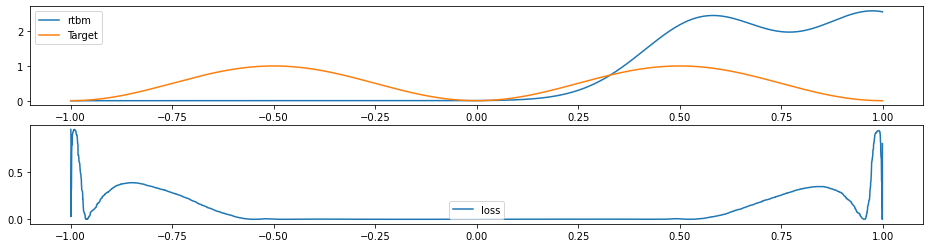

In [89]:
if do_uniform:
    original_x_uniform = np.array(sorted(-1.0 + 2.0*np.random.rand(int(nevt),1)))
    x_uniform, y_uniform = rtbm.get_transformation(original_x_uniform)
    my_uniform = my_fun(x_uniform)
    ll_uniform = loss(y_uniform, my_uniform) 

    plt.subplot(2,1,1)
    plt.plot(x_uniform, y_uniform, label="rtbm")
    plt.plot(x_uniform, my_uniform, label = "Target")
    _ = plt.legend()
    plt.subplot(2,1,2)
    plt.plot(x_uniform, ll_post, label="loss")
    _ = plt.legend()